In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/data_clean.csv')
df.head()

kw  rank  \
0  how to finish concrete     1   
1  how to finish concrete     4   
2  how to finish concrete     5   
3  how to finish concrete     6   
4  how to finish concrete     7   

                                                link  success  word_count  \
0  https://www.familyhandyman.com/project/how-to-...     True      1689.0   
1            https://www.wikihow.com/Finish-Concrete     True       324.0   
2  https://www.instructables.com/How-to-Finish-Co...     True      1417.0   
3  https://carrollsbuildingmaterials.com/diy-conc...     True      1600.0   
4  https://www.hunker.com/13402242/how-to-finish-...     True       738.0   

   percent_human  percent_ai  
0      99.926081    0.073917  
1      88.443929   11.556073  
2      94.222470    5.777531  
3      99.730074    0.269922  
4      97.359934    2.640062

In [89]:
def multiplotv(df, filter_col=None, min=None, max=None):
    # define subplots
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

   

    # apply filter and subtitle
    if filter_col:
        if min is not None and max is not None:
            if min < max:
                fig.text(0.5, 0.94, f'Filtered on {min} < {filter_col} < {max}', ha='center', fontsize=16)
                df = df[(df[filter_col] <= max) & (df[filter_col] >= min)]
            else:
                min, max = max, min
                fig.text(0.5, 0.94, f'Filtered on {min} > {filter_col} > {max}', ha='center', fontsize=16)
                df = df[(df[filter_col] >= max) | (df[filter_col] <= min)]
        elif min is not None and max is None:
            fig.text(0.5, 0.94, f'Filtered on {filter_col} > {min}', ha='center', fontsize=16)
            df = df[df[filter_col] >= min]
        elif min is None and max is not None:
            fig.text(0.5, 0.94, f'Filtered on {filter_col} < {max}', ha='center', fontsize=16)
            df = df[df[filter_col] <= max]
        else:
            print(f'Warning: you must provide a min and/or max on which to filter on {filter_col} or no filtering will occur')

    # apply main title
    main_title = f'Correlation Study: Rank vs Percent Human ({len(df)} data points)'
    fig.suptitle(main_title, fontsize=16, fontweight='bold', y=.98)
        
    # Fig 1: Q-Q plot [0, 0]
    st.probplot(df['percent_human'], dist='norm', plot=axs[0, 0])
    axs[0, 0].set_title('Figure 1: Q-Q Plot of Percent Human')
    axs[0, 0].set_xlabel('Theoretical quantiles')
    axs[0, 0].set_ylabel('Sample quantiles')
    axs[0, 0].text(0.02, 0.95, 'Data is not normally distributed\nand cannot be evaluated using Pearson\'s method', transform=axs[0, 0].transAxes, fontsize=12, verticalalignment='top', color='black')

    
    # Fig 2: Histogram [0, 1]
    sns.histplot(data=df['percent_human'], kde=False, binwidth=1, color='green', ax=axs[0, 1])
    axs[0, 1].set_title('Figure 2: Histogram of Percent Human')
    axs[0, 1].set_xlabel('Percent Human')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_xlim(-5, 105)
    axs[0, 1].set_ylim(0, None)
    skewness = round(st.skew(df['percent_human']),2)
    axs[0, 1].text(0.02, 0.95, f'Data Skewness {skewness}', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')
    #axs[0, 1].text(0.02, 0.90, f'Over 1/3 of data in top 2%', transform=axs[0, 1].transAxes, fontsize=12, verticalalignment='top', color='black')

    
    # Fig 3: Violin plot [1, 0]
    sns.violinplot(ax=axs[1, 0], data=df, x="rank", y="percent_human", scale="count", inner="box", color="#00aa00", saturation=0.5, cut=0, linewidth=.9)

        # plot mean lines
    for i, mean in enumerate(df.groupby("rank")["percent_human"].mean()):
        axs[1, 0].hlines(mean, i-0.25, i+0.25, linewidth=1, color='#444444', zorder=100)

        # plot median markers
    median_markers = df.groupby('rank')['percent_human'].median()
    sns.scatterplot(ax=axs[1, 0], x=median_markers.index-1, y=median_markers.values, marker='o', s=20, color='white', edgecolor='black', zorder=100)
    
    axs[1, 0].set_title('Fig 3:Percent Human vs Rank')
    #axs[1, 0].set_facecolor('#ffffff')
    axs[1, 0].set_xlabel("Rank",size = 16,alpha=0.7)
    axs[1, 0].set_ylabel("Percent Human",size = 16,alpha=0.7)

   
    # Fig 4: Scatter plot [1, 1]
    grouped_data = df.groupby('rank')
    mean_percent_human = grouped_data['percent_human'].mean().reset_index()
    sns.scatterplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human',  color='green')
    sns.regplot(ax=axs[1, 1], data=mean_percent_human, x='rank', y='percent_human', color='green', scatter=False, line_kws={'linestyle':'--'})
    axs[1, 1].set_title('Figure 4: Scatter Plot of Mean Percent Human vs Rank')
    axs[1, 1].set_xlabel('Rank')
    axs[1, 1].set_ylabel('Mean Percent Human')
    axs[1, 1].set_xticks(np.arange(1, 21))
    axs[1, 1].legend(handles=axs[1, 1].lines[::len(mean_percent_human)], labels=['Best fit line'])
    axs[1, 1].text(0.02, 0.05, f'Percent Human is weakly correlated to Rank with a high degree of certainty', transform=axs[1, 1].transAxes, fontsize=10, verticalalignment='top', color='black')

        # Calculate correlation coefficients and p-values
    pb_corr, pb_pval = st.pointbiserialr(df['rank'], df['percent_human'])
    spearman_corr, spearman_pval = st.spearmanr(df['rank'], df['percent_human'])
    kendall_tau, kendall_pval = st.kendalltau(df['rank'], df['percent_human'])

        # Create a dictionary to store the results
    corr = {
        'Method': ['Point Biserial', 'Spearman', 'Kendall'],
        'Correlation Coefficient': [pb_corr, spearman_corr, kendall_tau],
        'P-value': [pb_pval, spearman_pval, kendall_pval]
    }

        # Create a pandas dataframe from the corr dict
    df_corr = pd.DataFrame(corr)

        # Create a table to display the correlation coefficients and p-values
    col_labels = ['Method', 'Corr Coef', 'P-value']
    table_data = [col_labels] + df_corr.values.tolist()

    table = axs[1, 1].table(cellText=table_data,
                    colLabels=None,
                    cellLoc='center',
                    bbox=[0.02, 0.08, 0.5, 0.15])  # x, y, width, height
    table.set_fontsize(10)

        # Format the table to use 4 significant figures
    for i in range(1, len(table_data)):
        for j in range(1, 3):
            cell = table.get_celld()[i, j]
            cell_text = cell.get_text().get_text()
            cell_text = float(cell_text)
            cell_text = f'{cell_text:.4g}'
            cell.get_text().set_text(cell_text)

    # shrink outer margin
    fig.subplots_adjust(left=0.05, right=0.95, top=.90, bottom=0.05)
   
    fig.savefig('figures/Fig_1-4.png')
    plt.show()

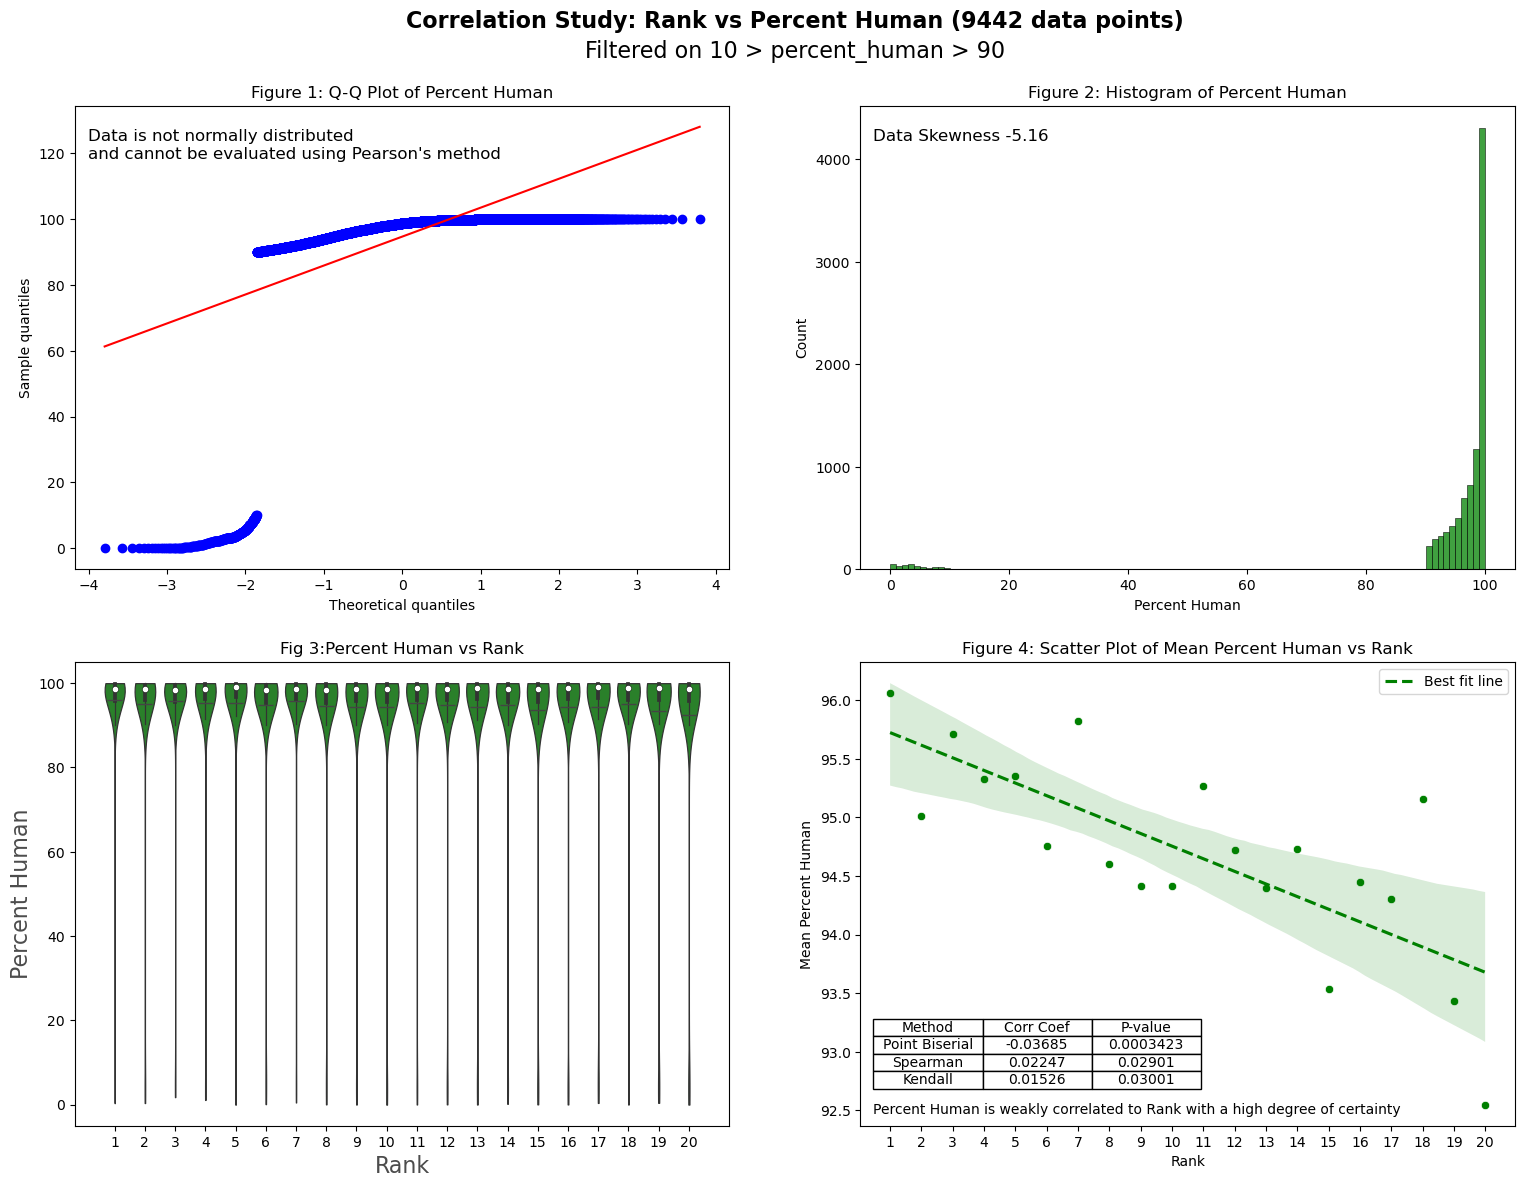

In [90]:
multiplotv(df, 'percent_human', 90, 10)

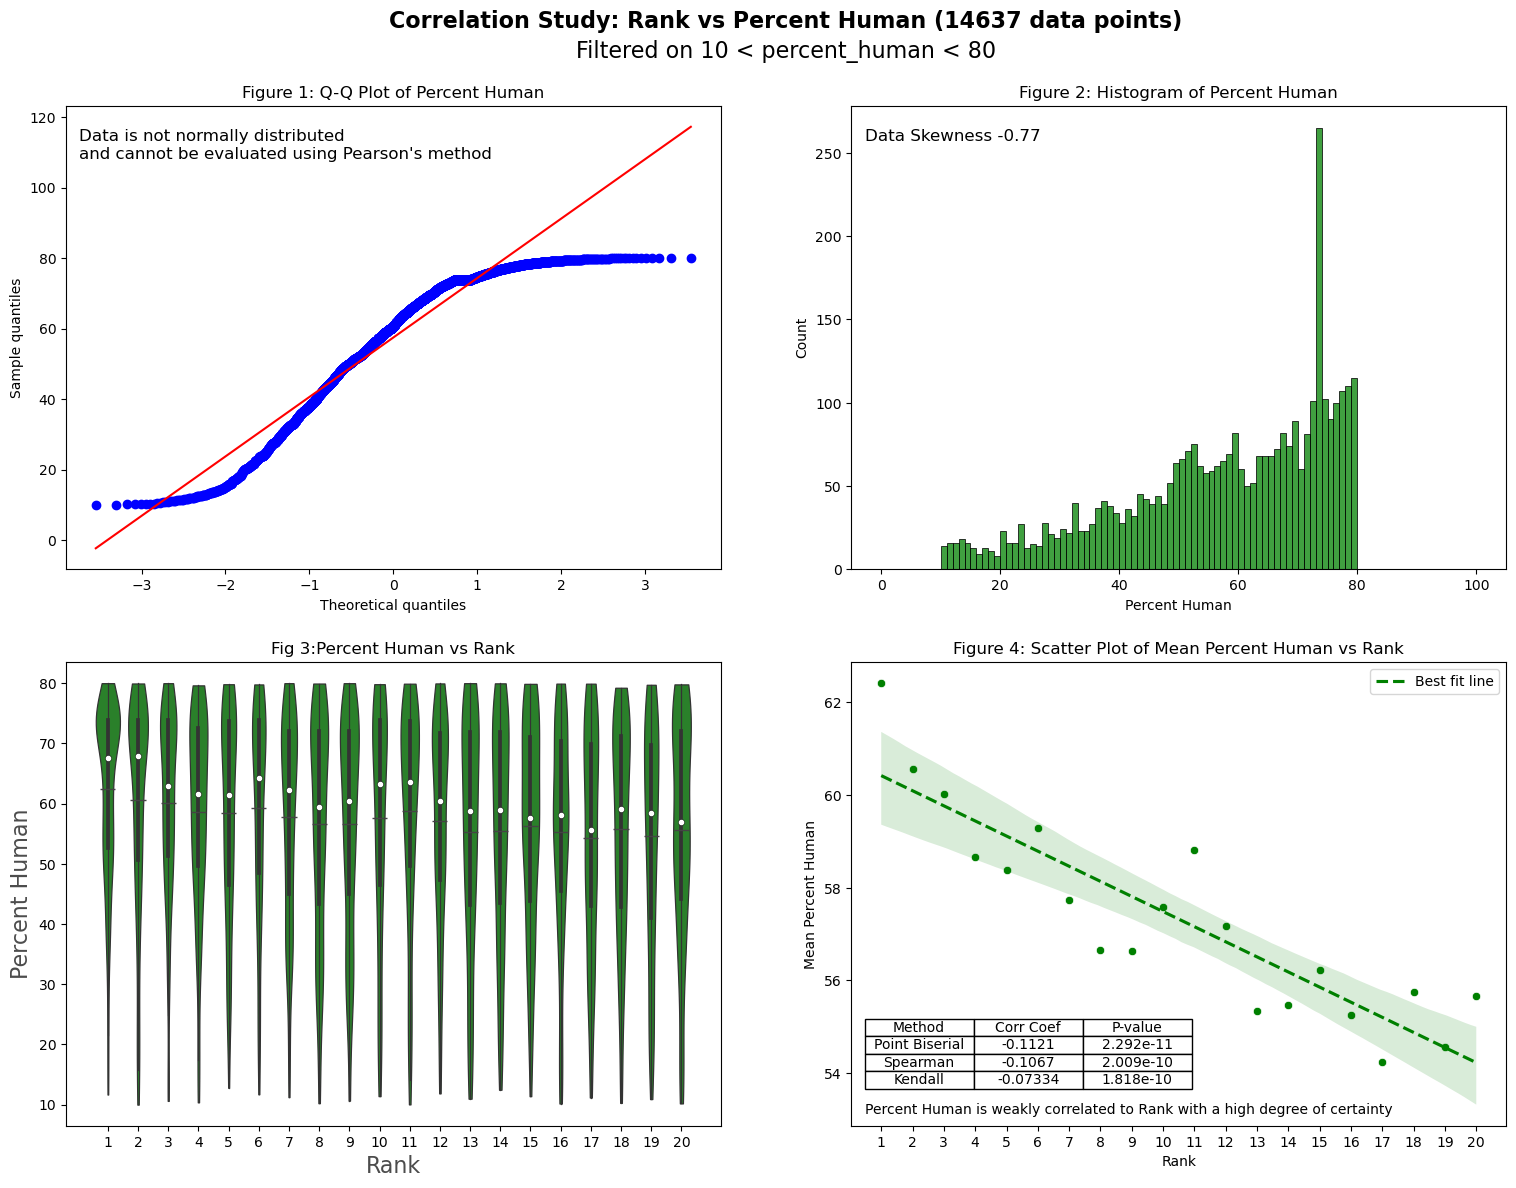

In [33]:
multiplotv(df, 'percent_human', 10, 80)

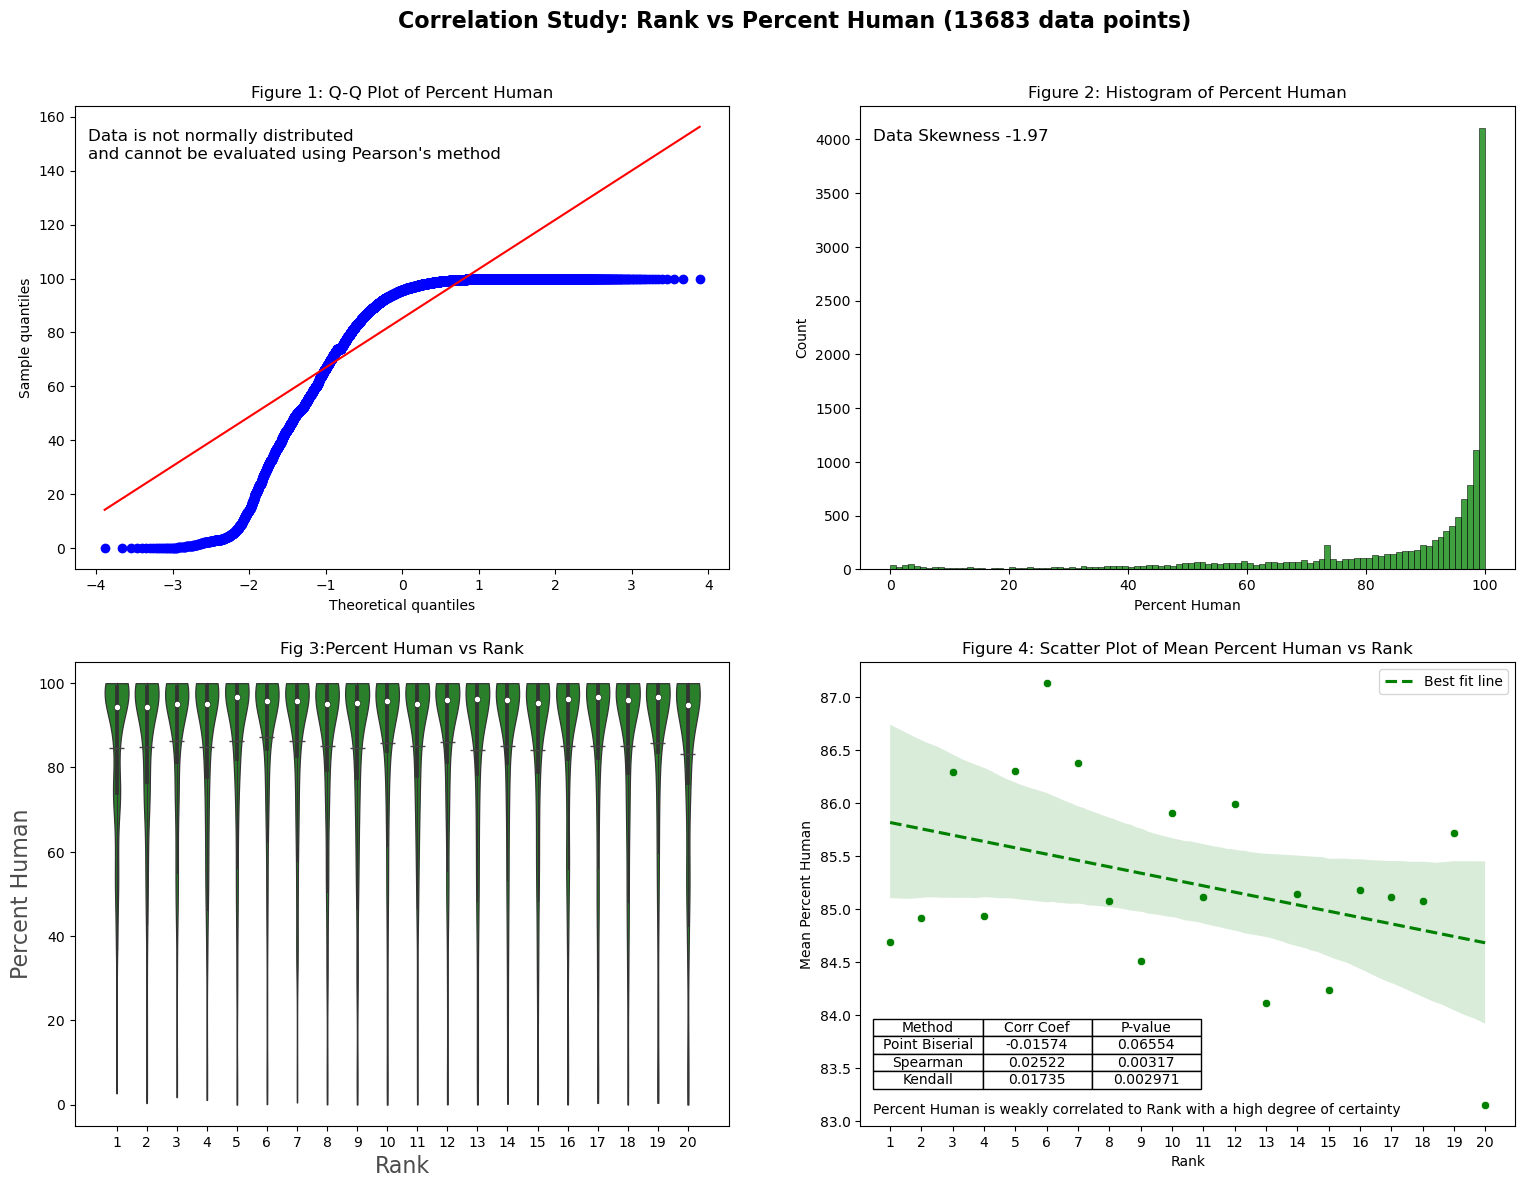

In [34]:
df_10_ky = df.groupby('kw').filter(lambda x: len(x) >= 10)
multiplotv(df_10_ky)

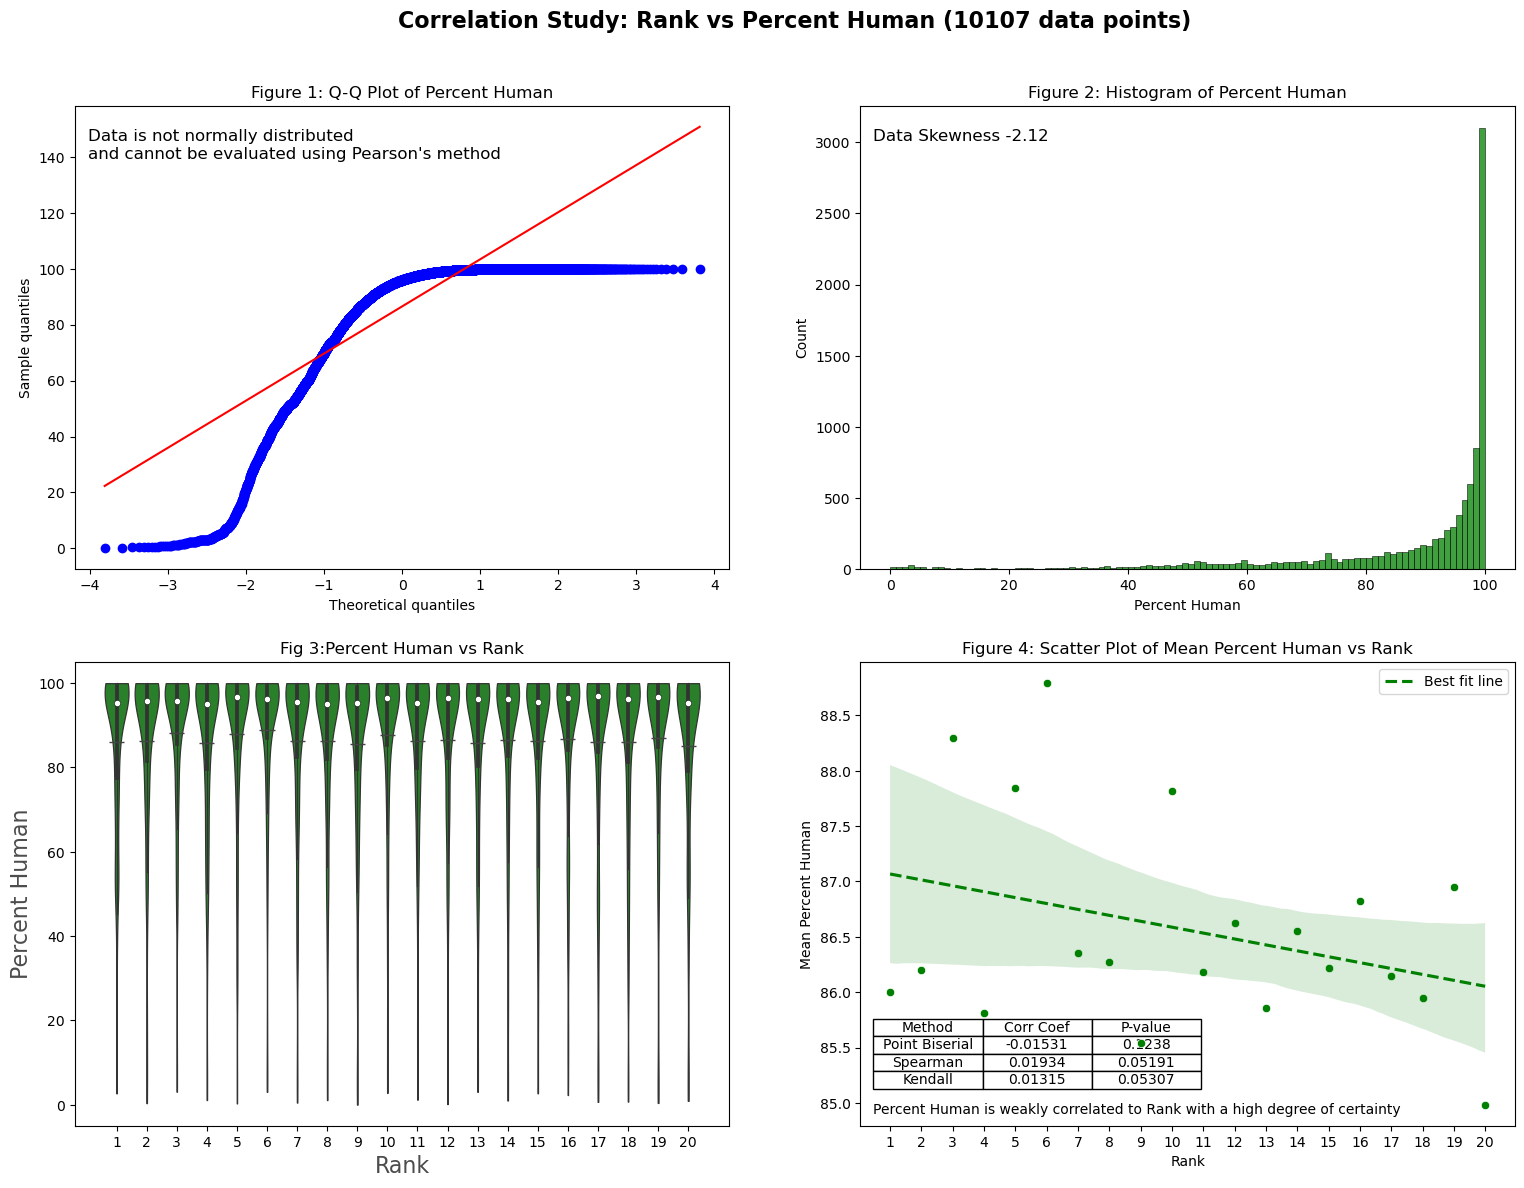

In [35]:
df_15_ky = df.groupby('kw').filter(lambda x: len(x) >= 15)
multiplotv(df_15_ky)

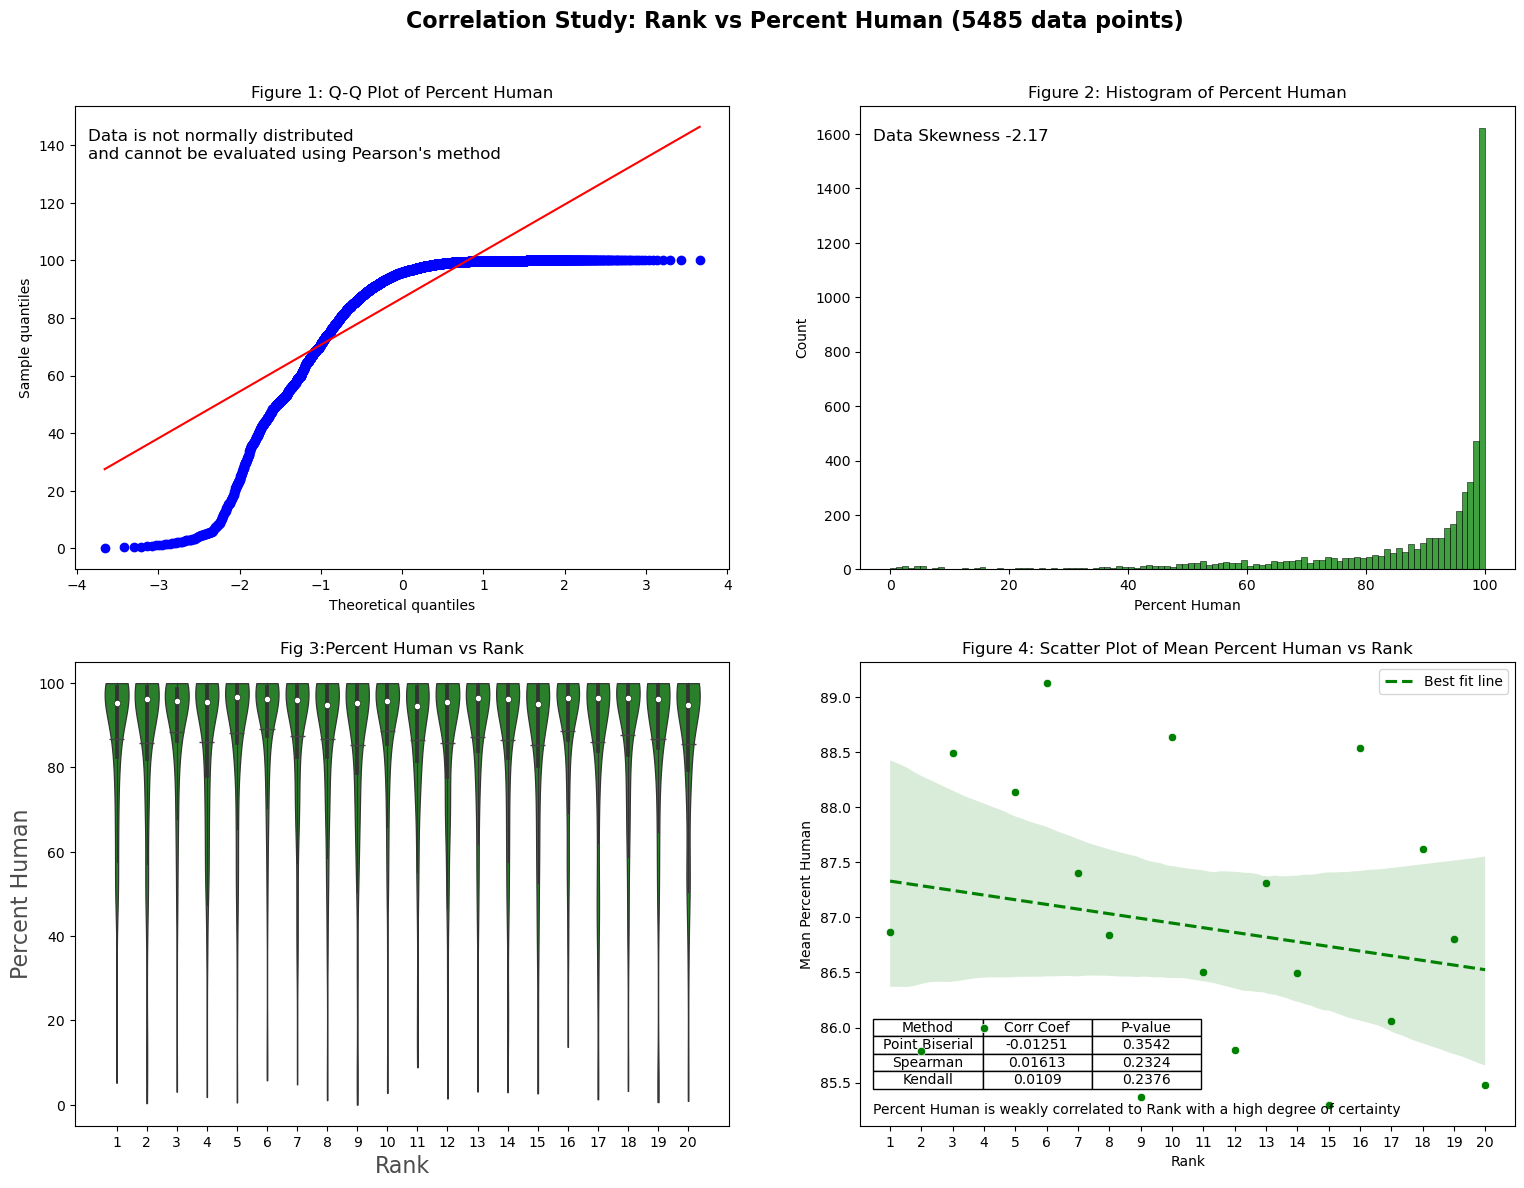

In [36]:
df_18_ky = df.groupby('kw').filter(lambda x: len(x) >= 18)
multiplotv(df_18_ky)

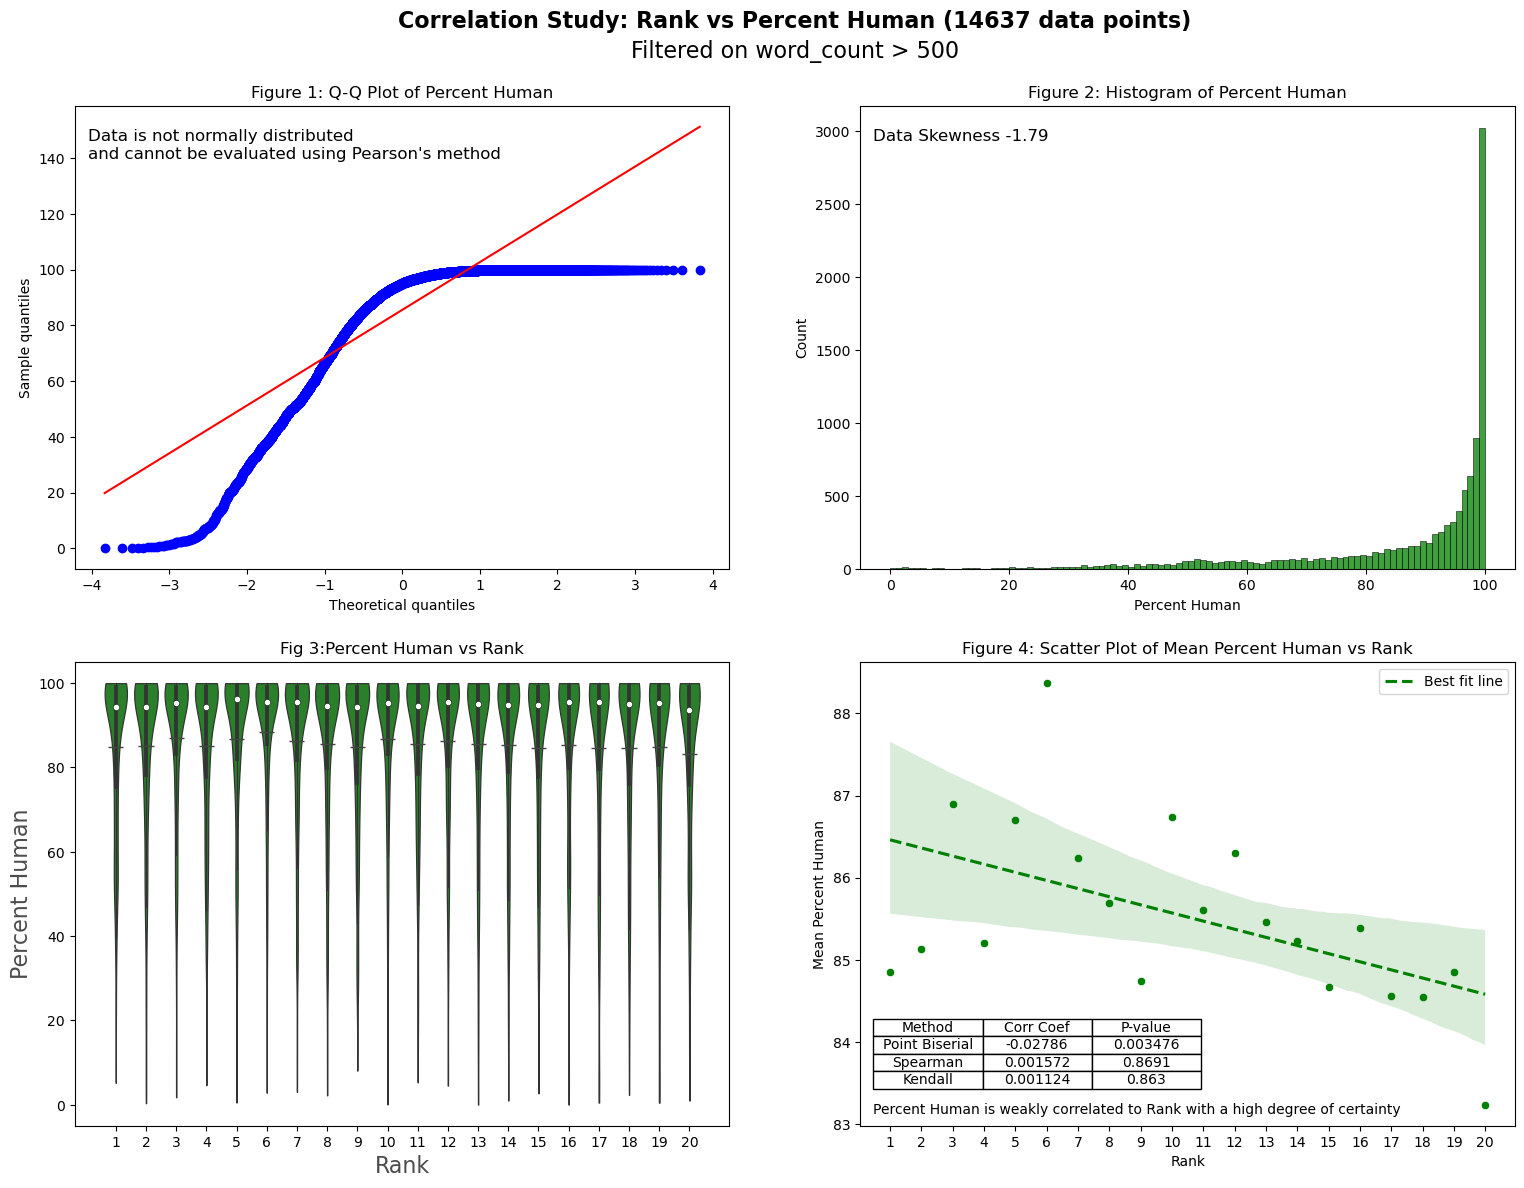

In [37]:
multiplotv(df, 'word_count', 500)

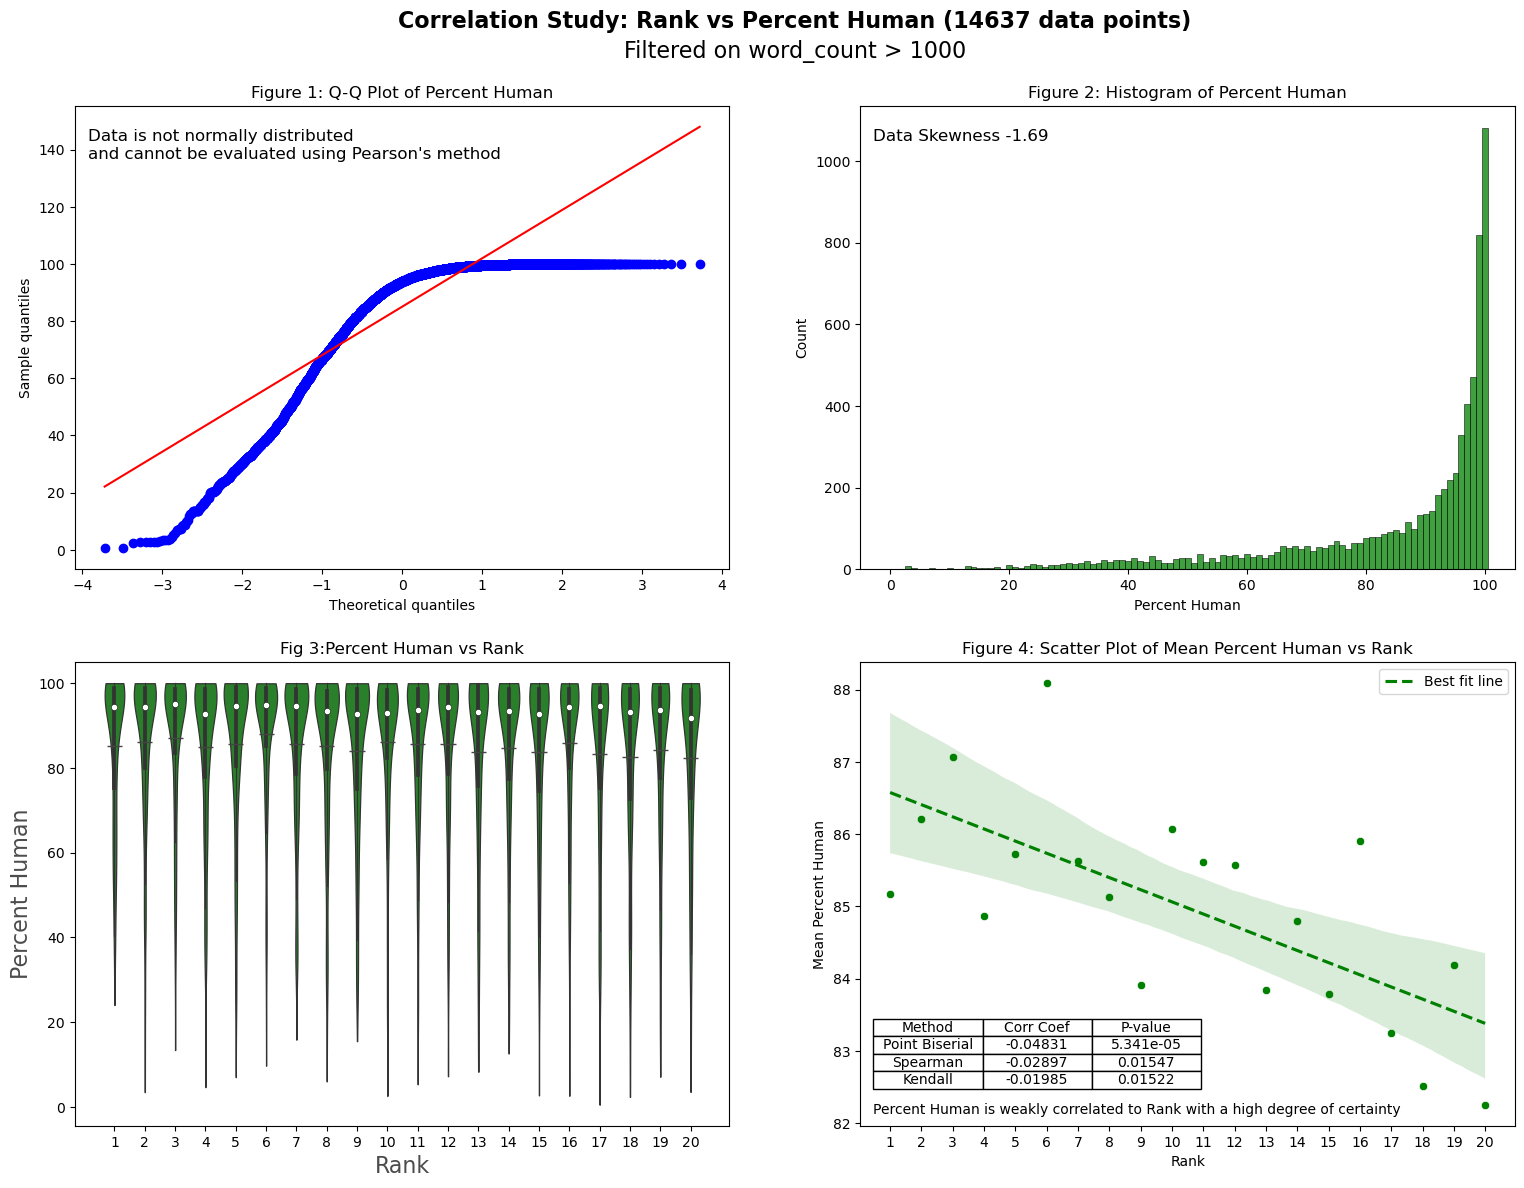

In [38]:
multiplotv(df, 'word_count', 1000)

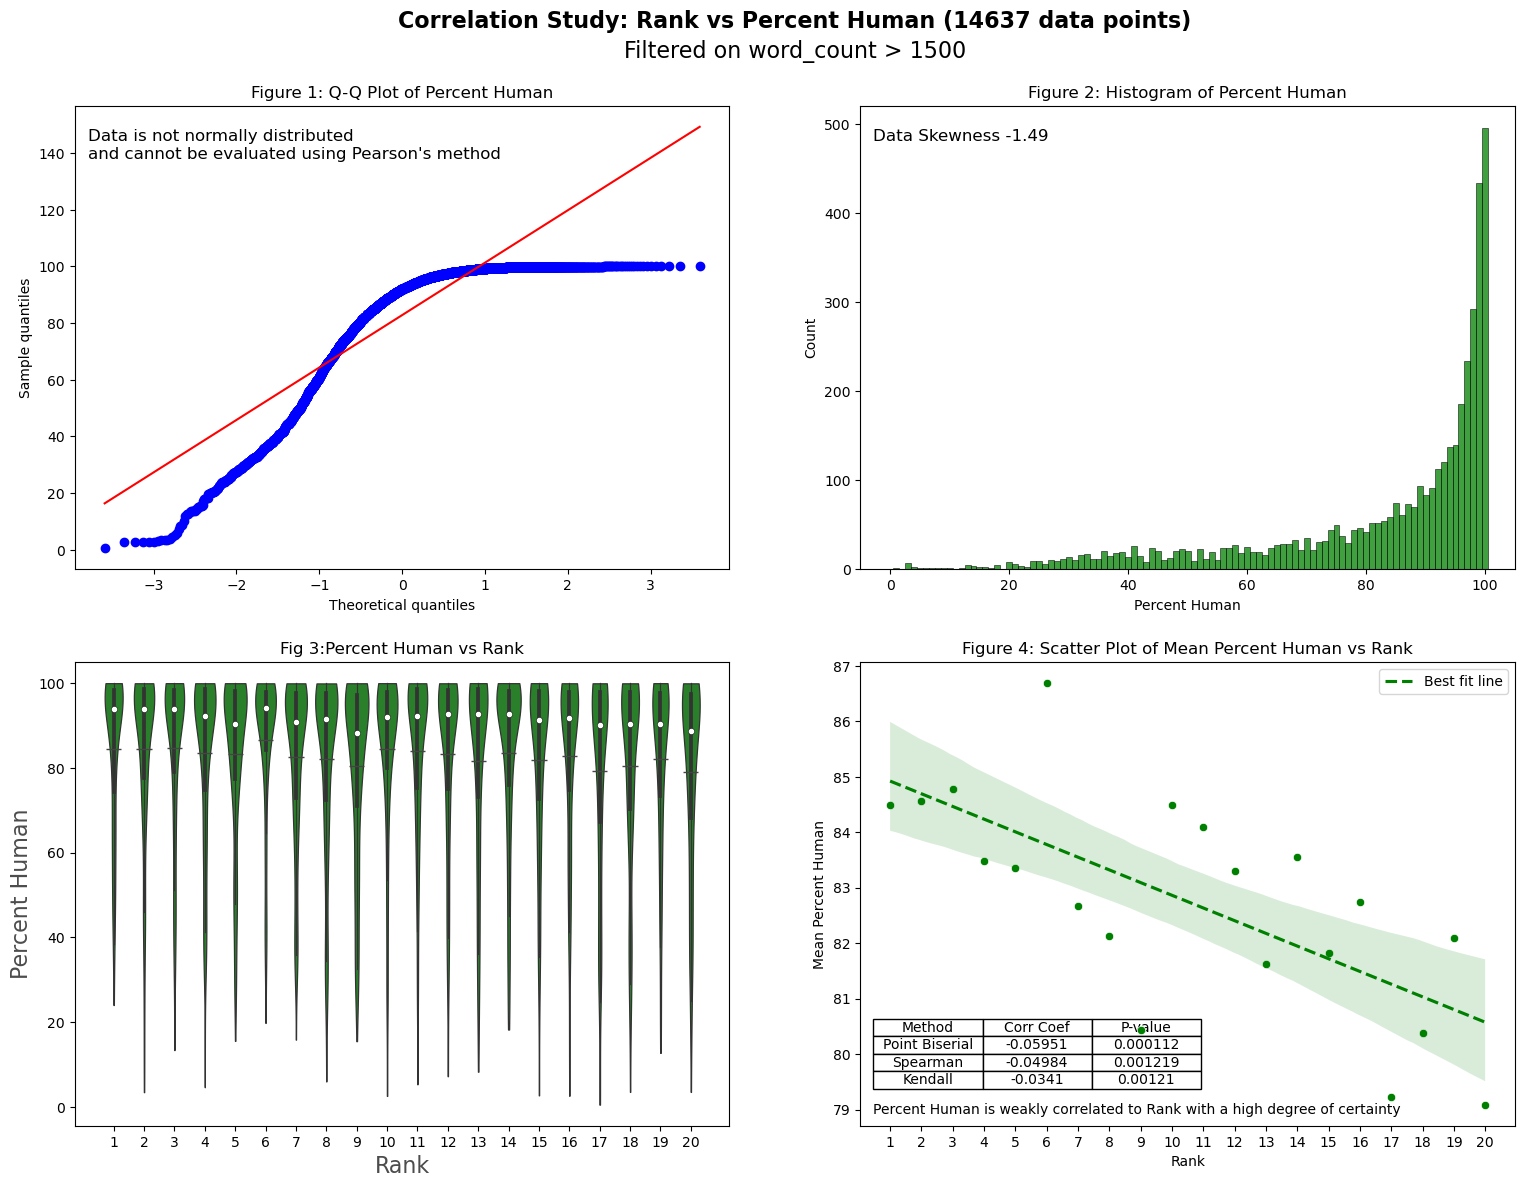

In [39]:
multiplotv(df, 'word_count', 1500)

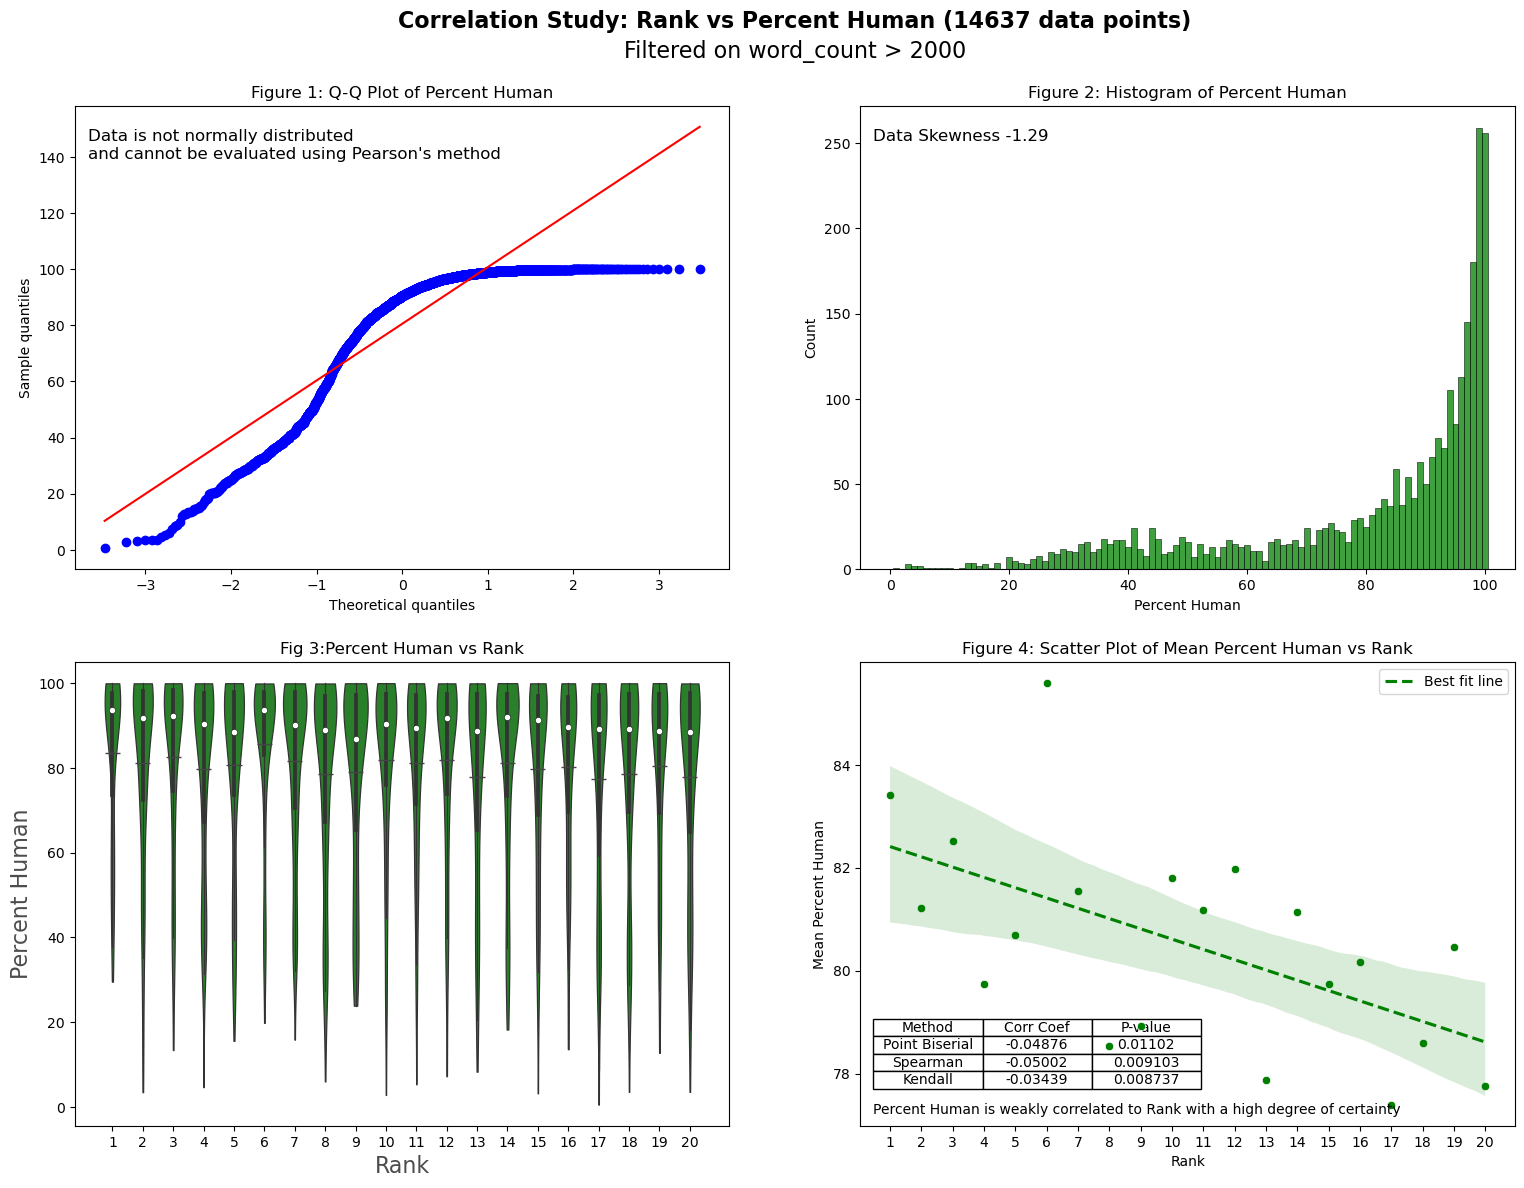

In [53]:
multiplotv(df, 'word_count', 2000)

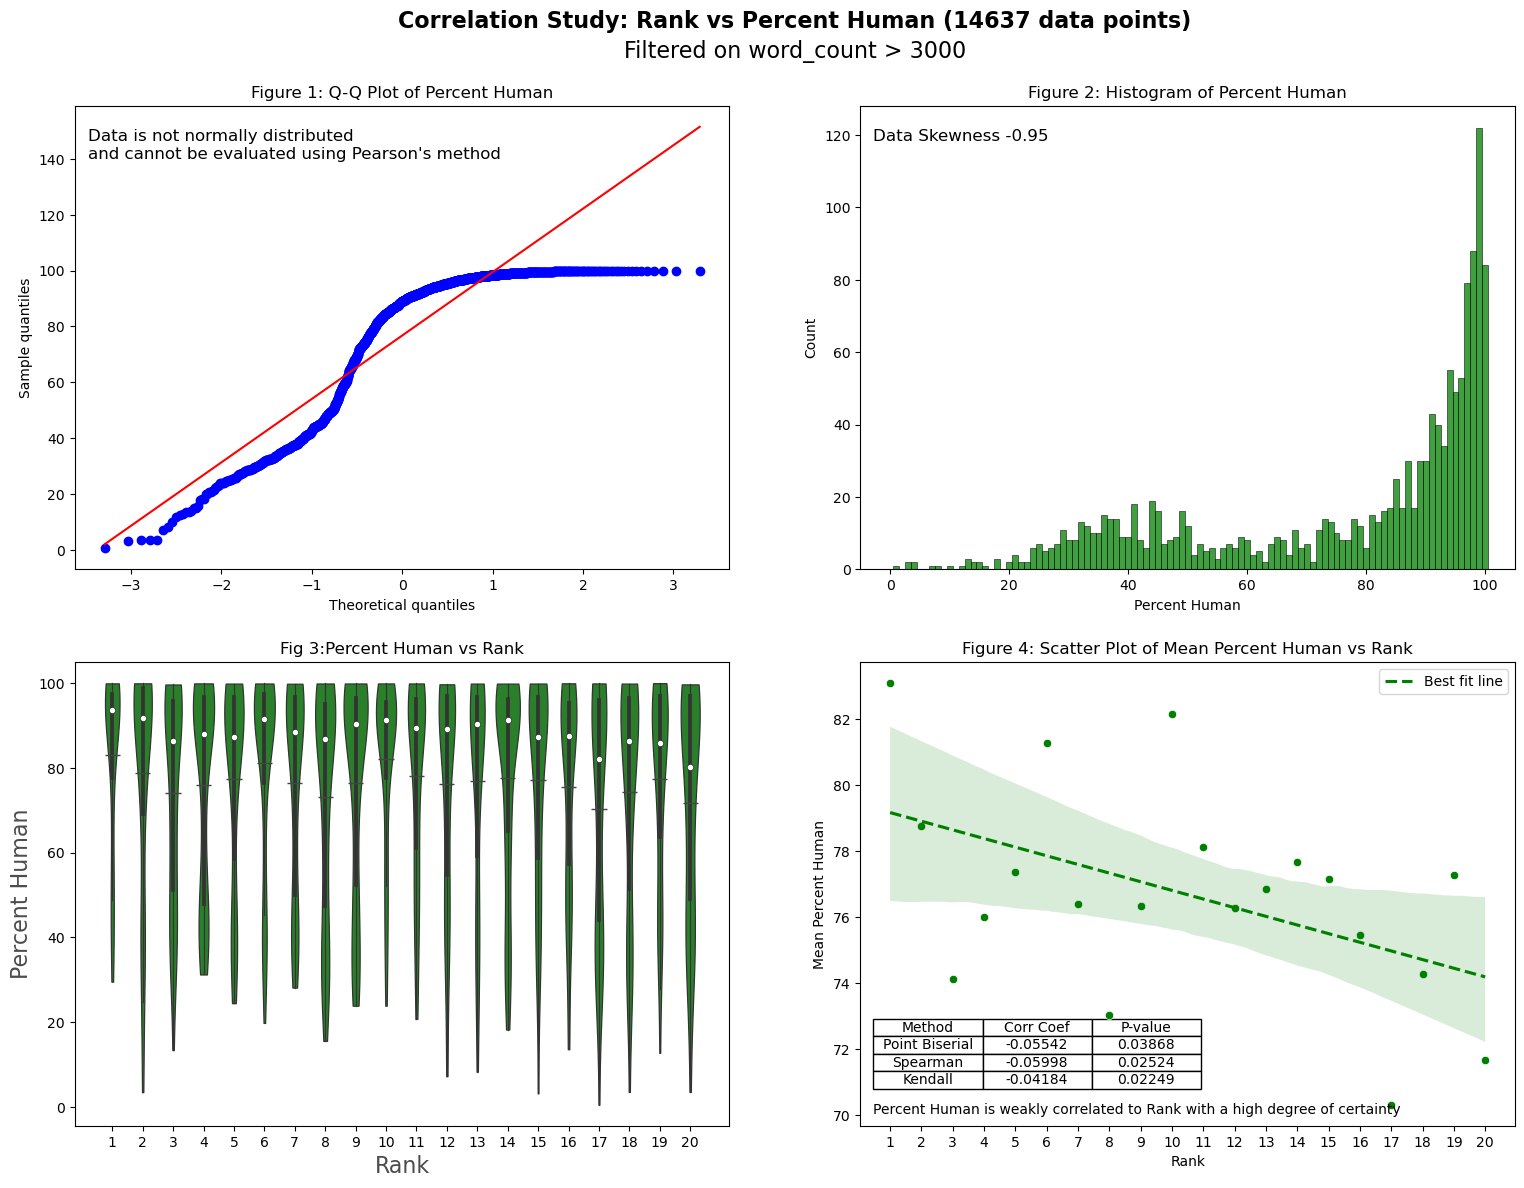

In [54]:
multiplotv(df, 'word_count', 3000)

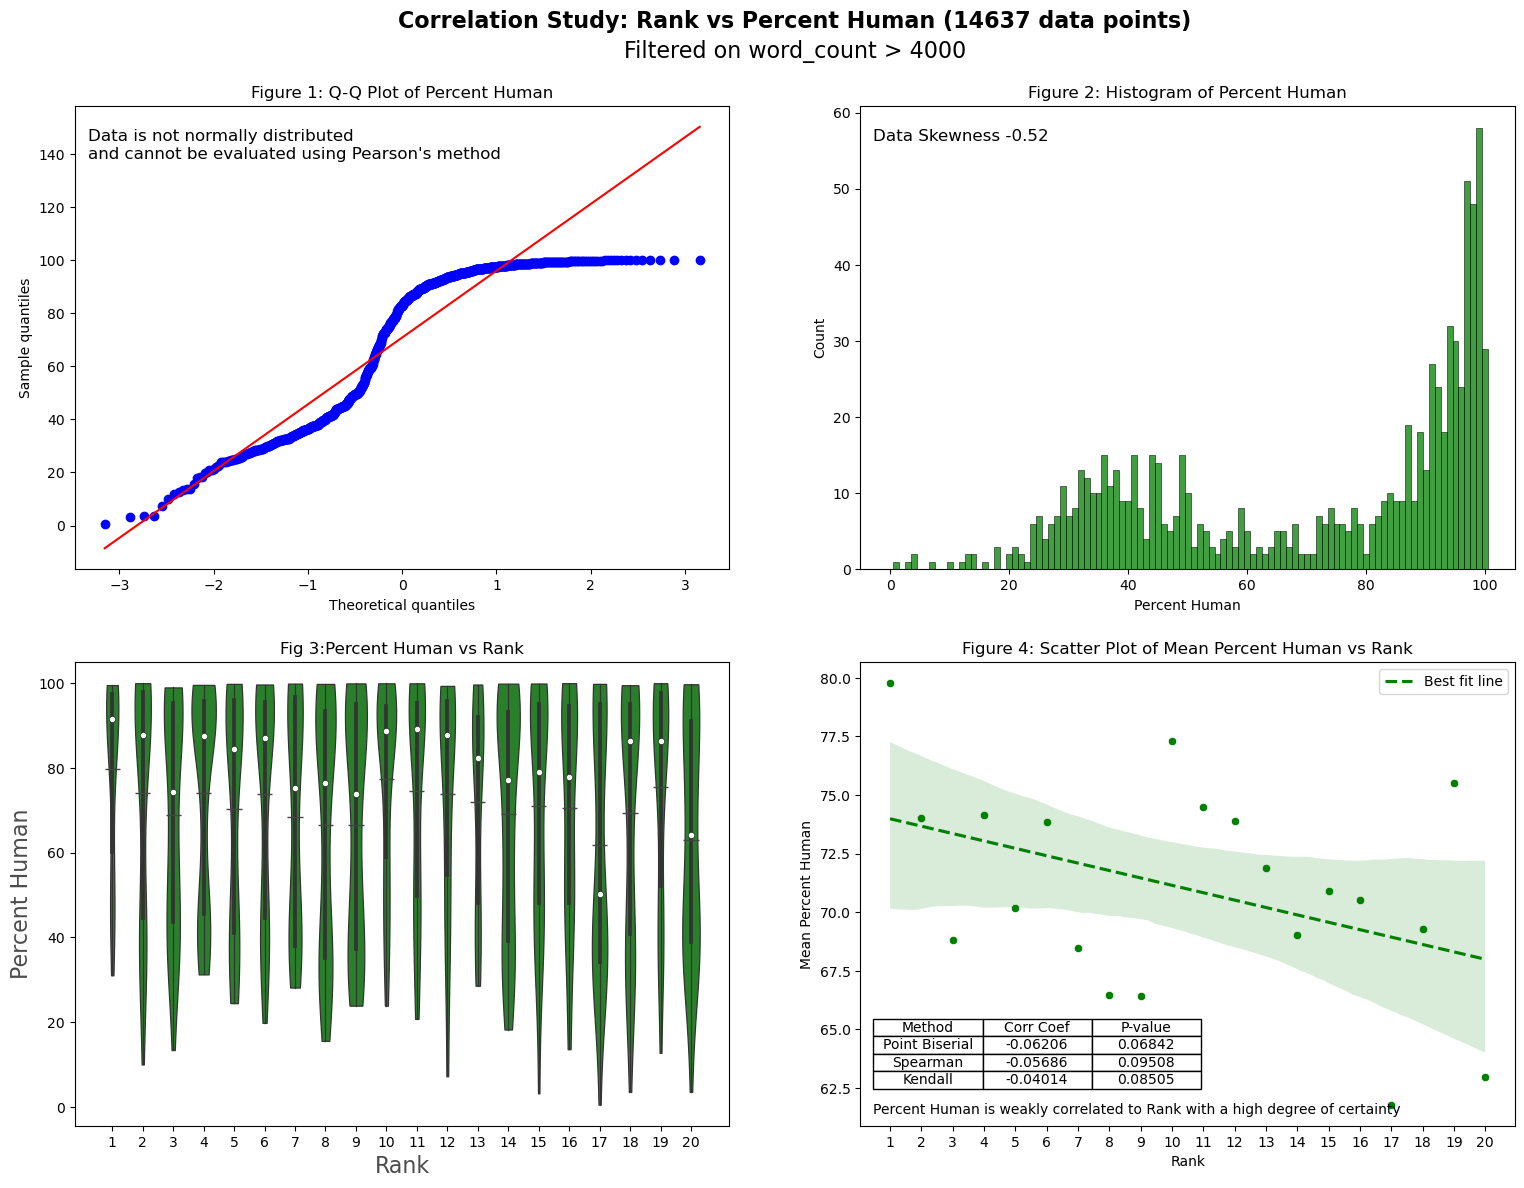

In [55]:
multiplotv(df, 'word_count', 4000)

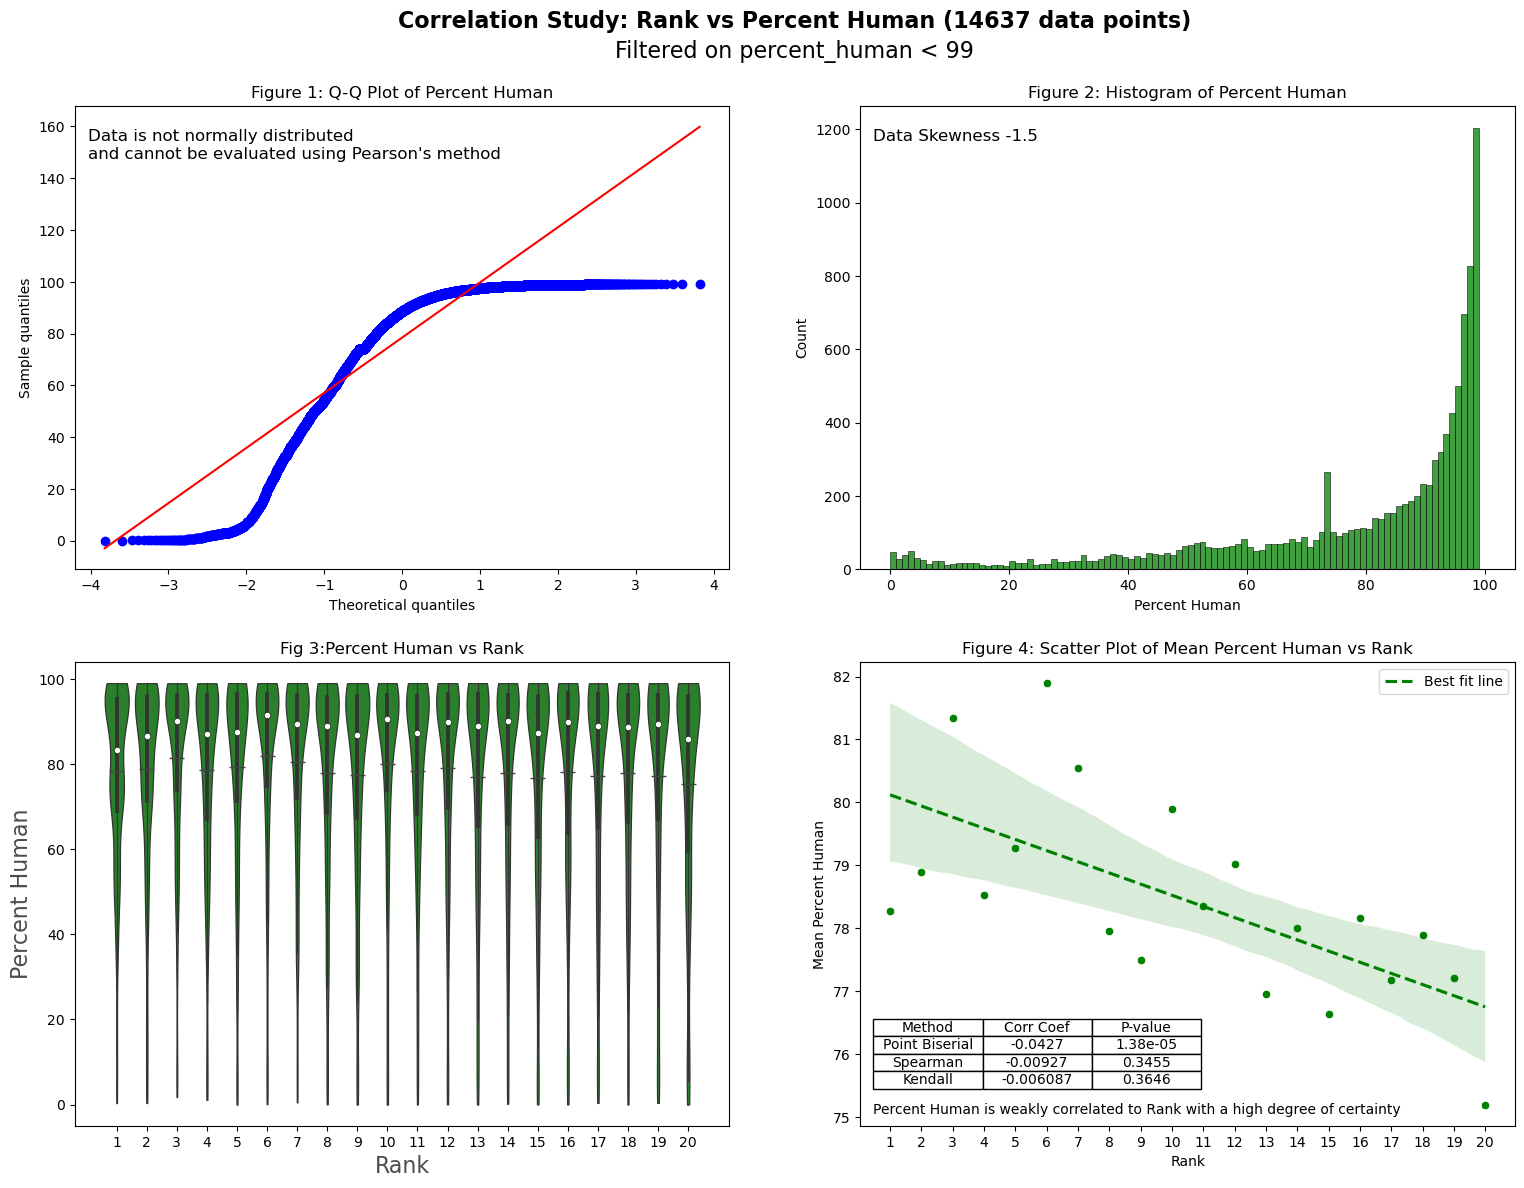

In [57]:
multiplotv(df, 'percent_human', max=99)

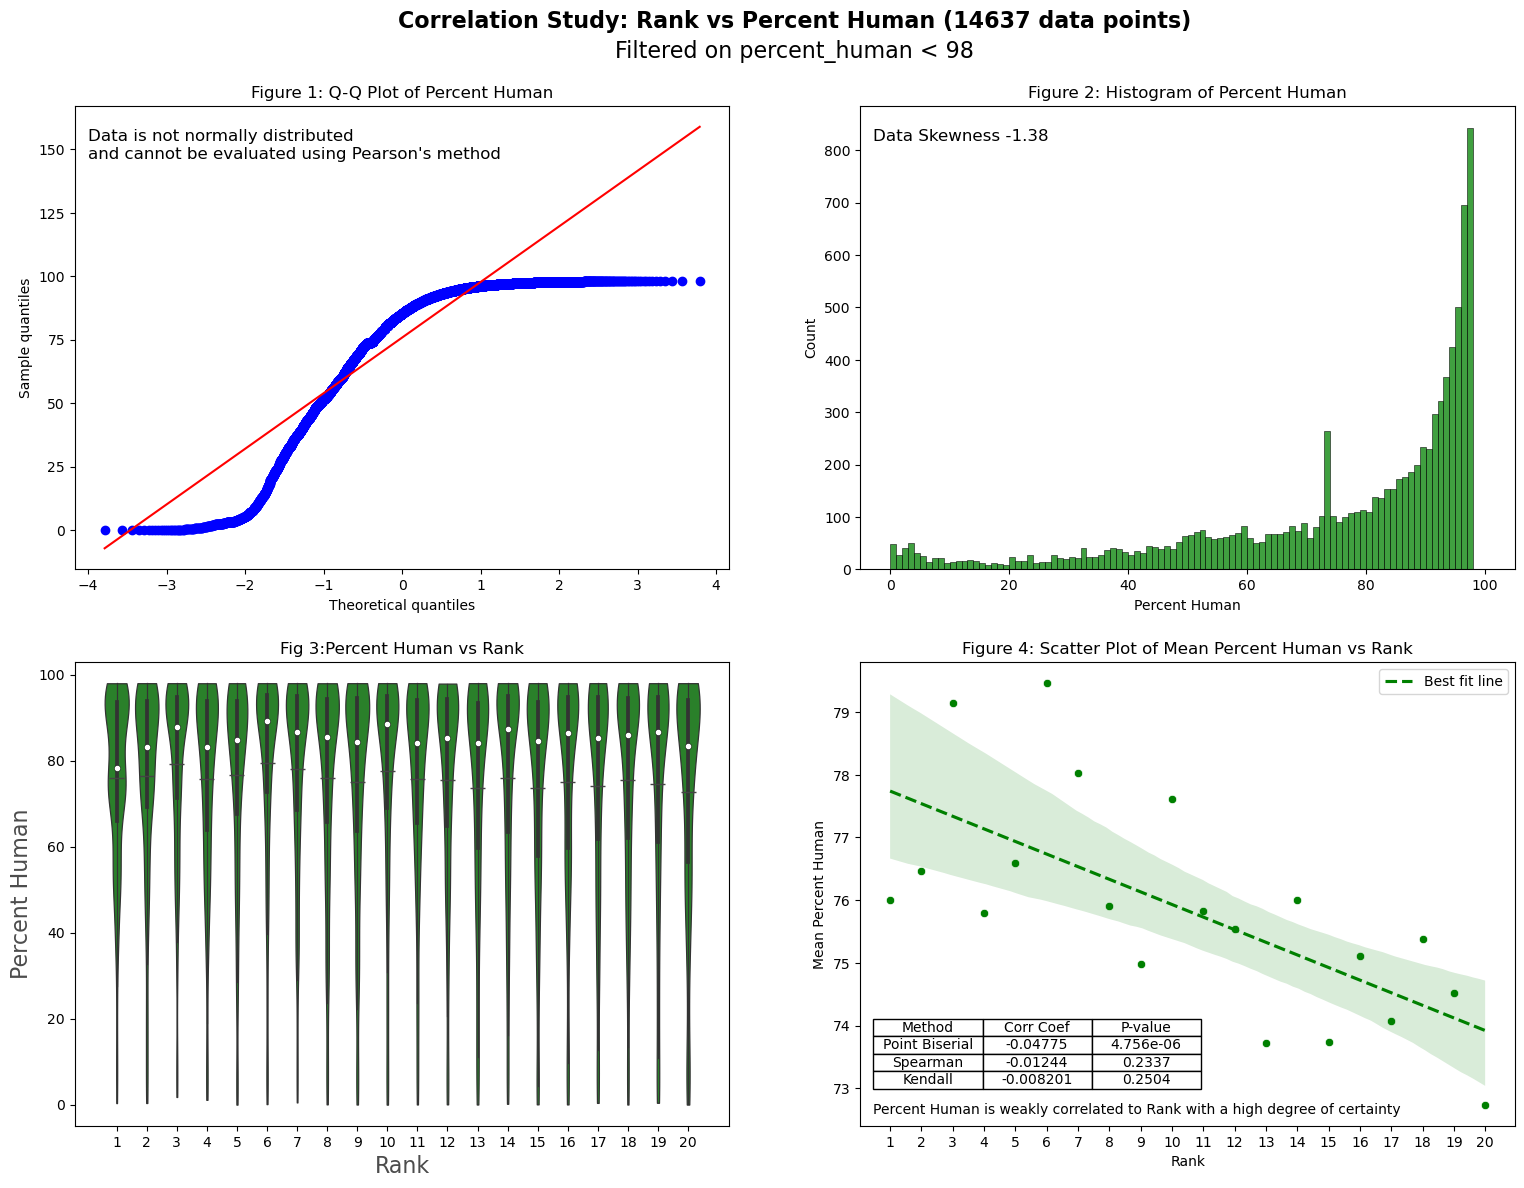

In [58]:
multiplotv(df, 'percent_human', max=98)

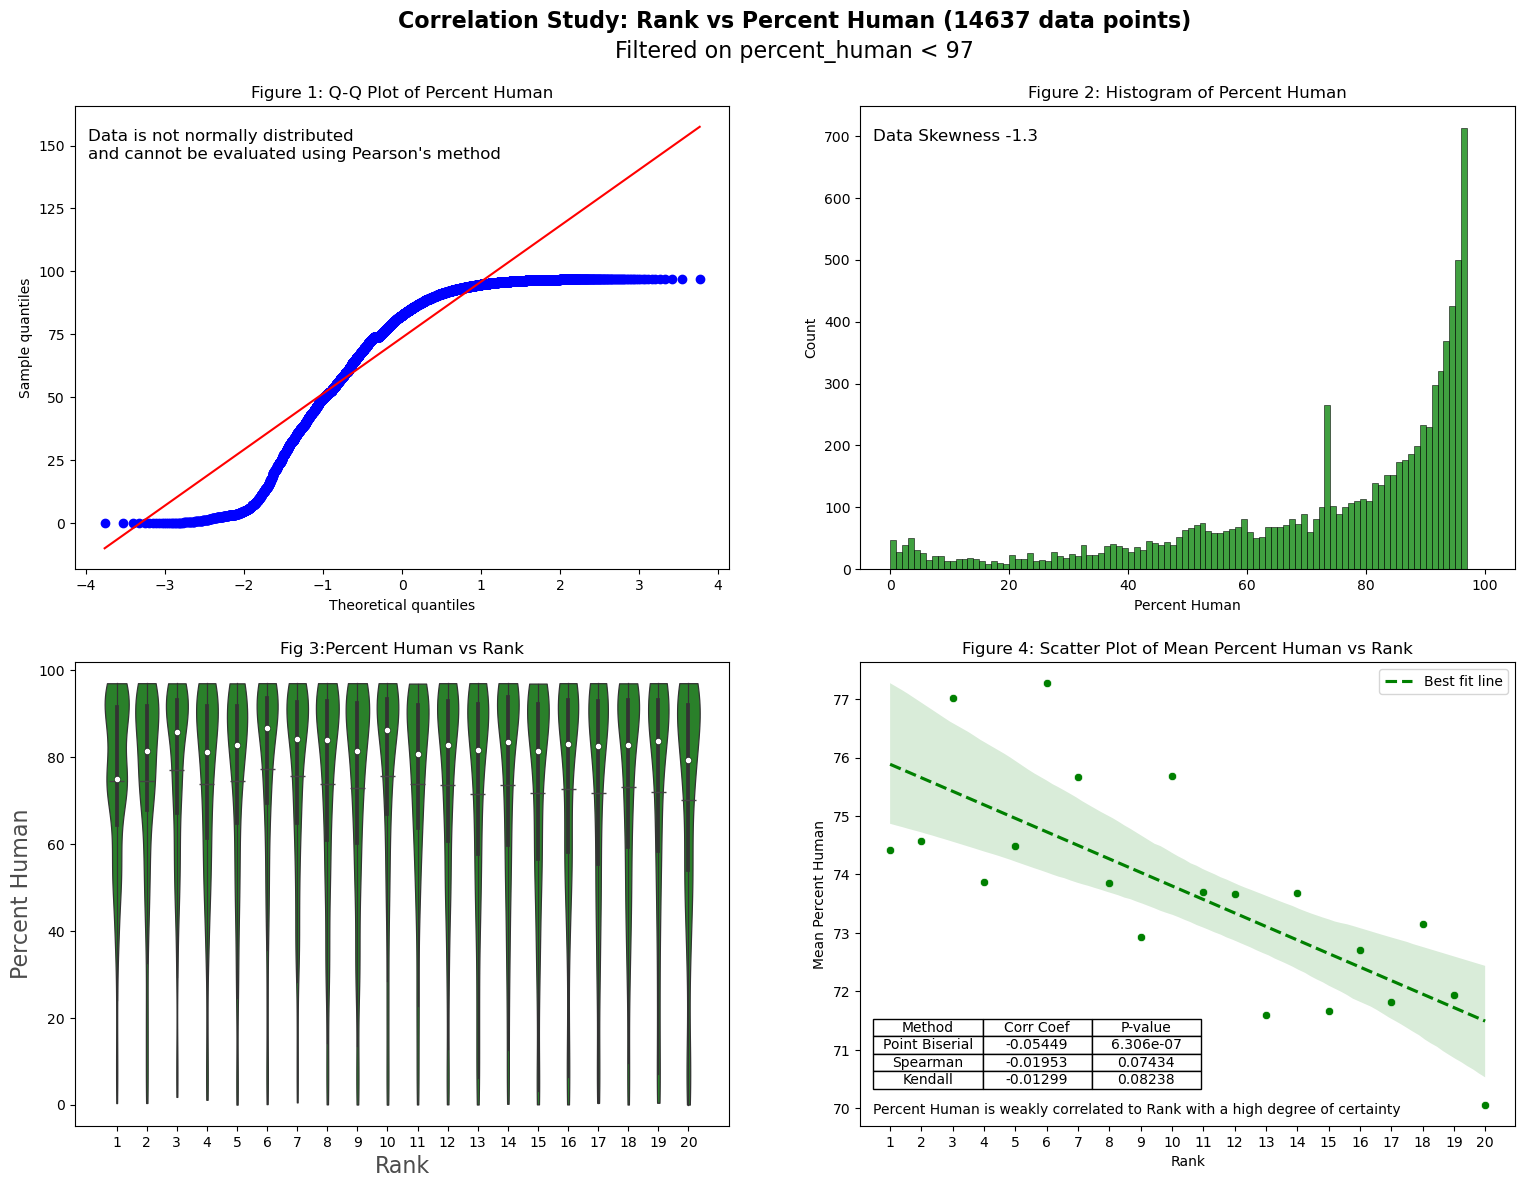

In [59]:
multiplotv(df, 'percent_human', max=97)

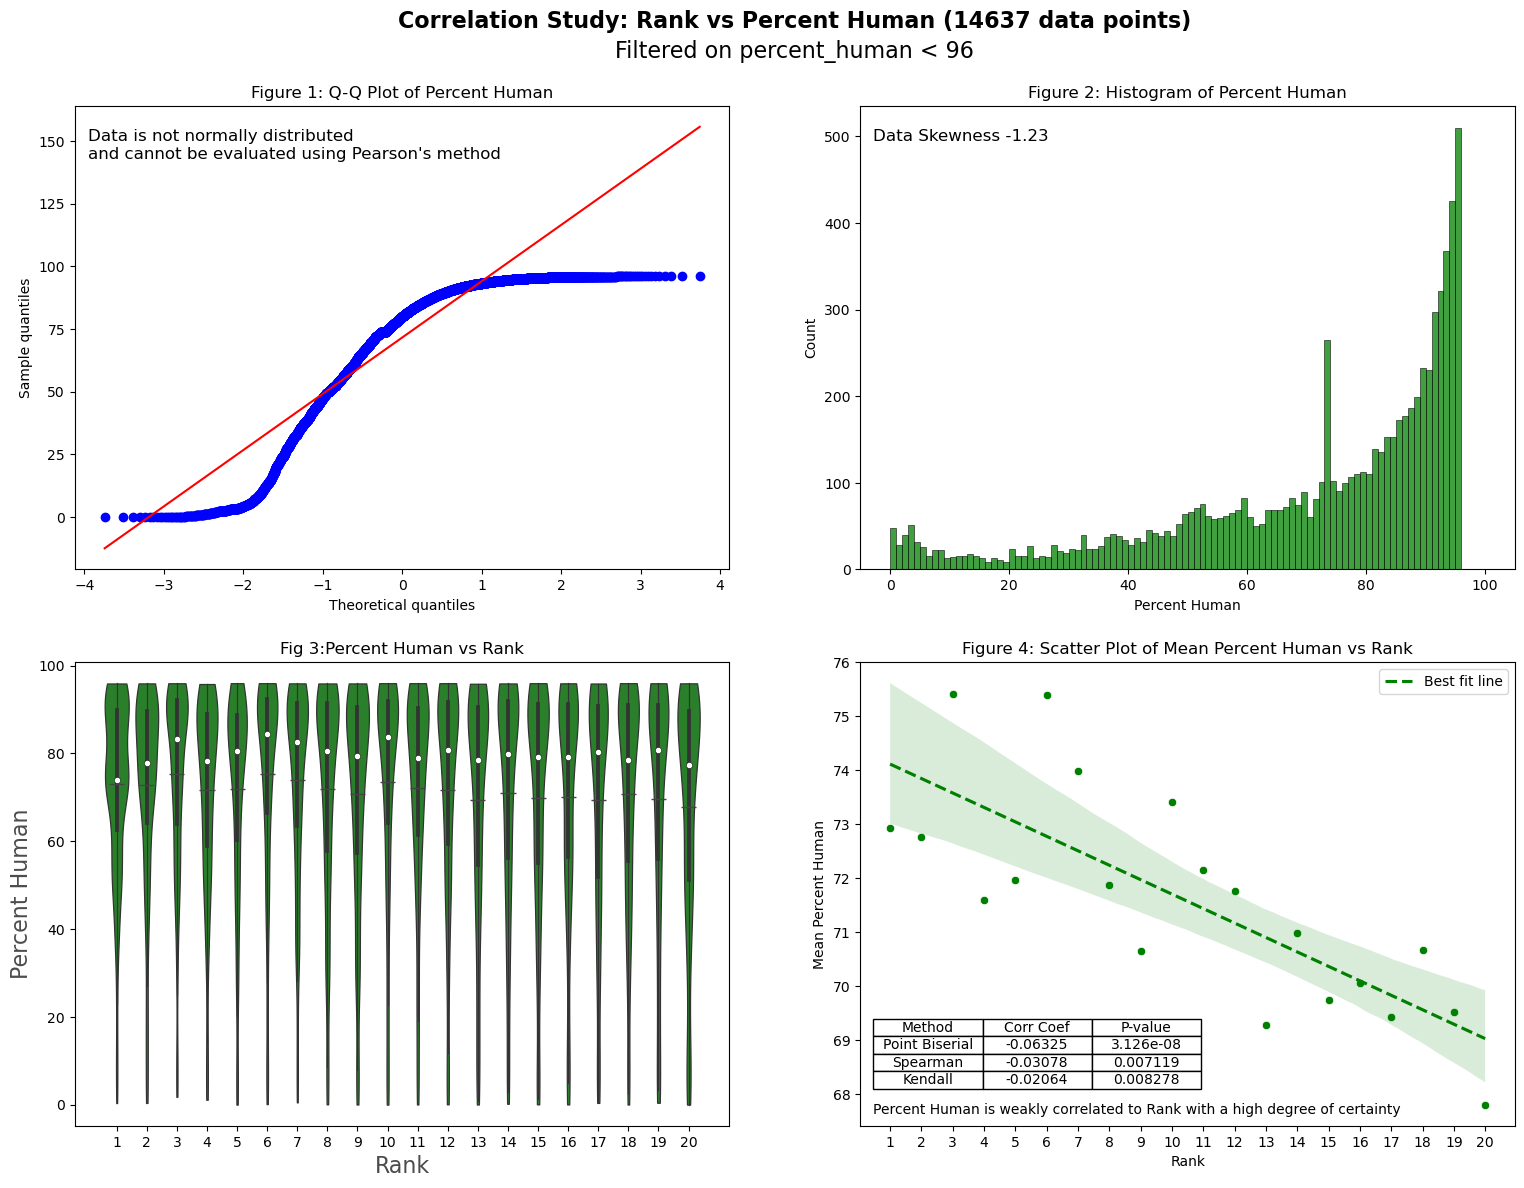

In [60]:
multiplotv(df, 'percent_human', max=96)

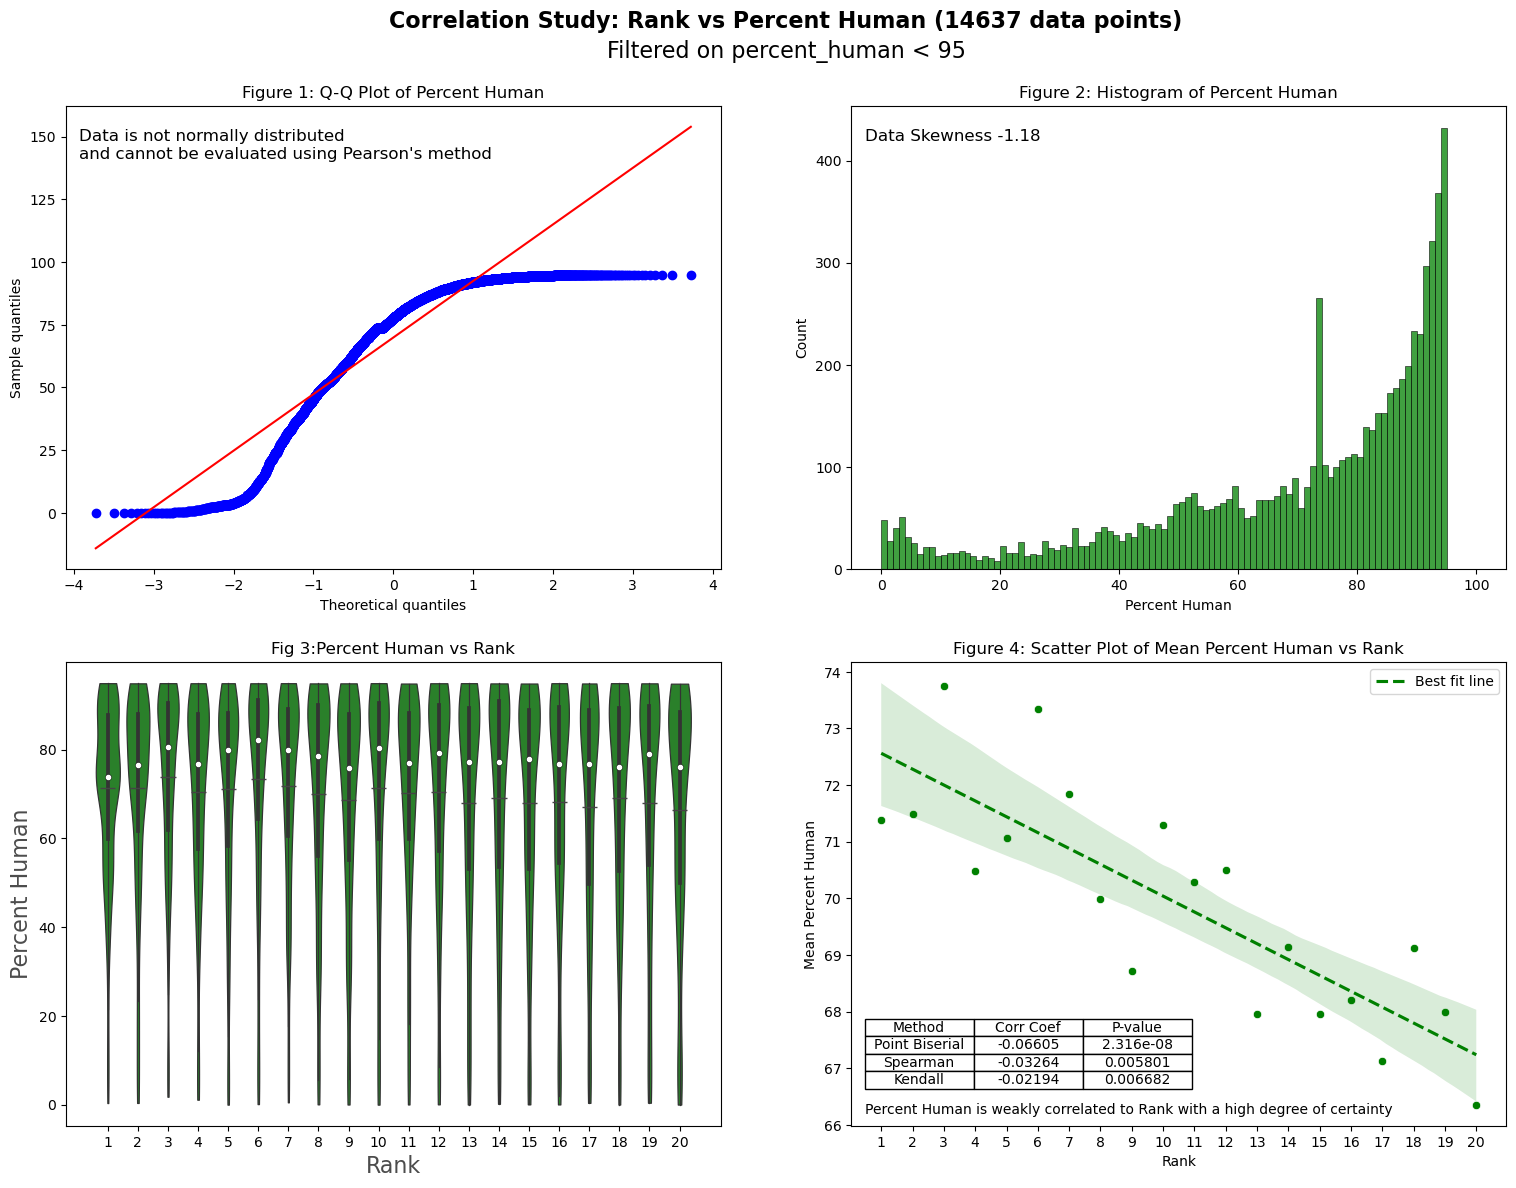

In [61]:
multiplotv(df, 'percent_human', max=95)

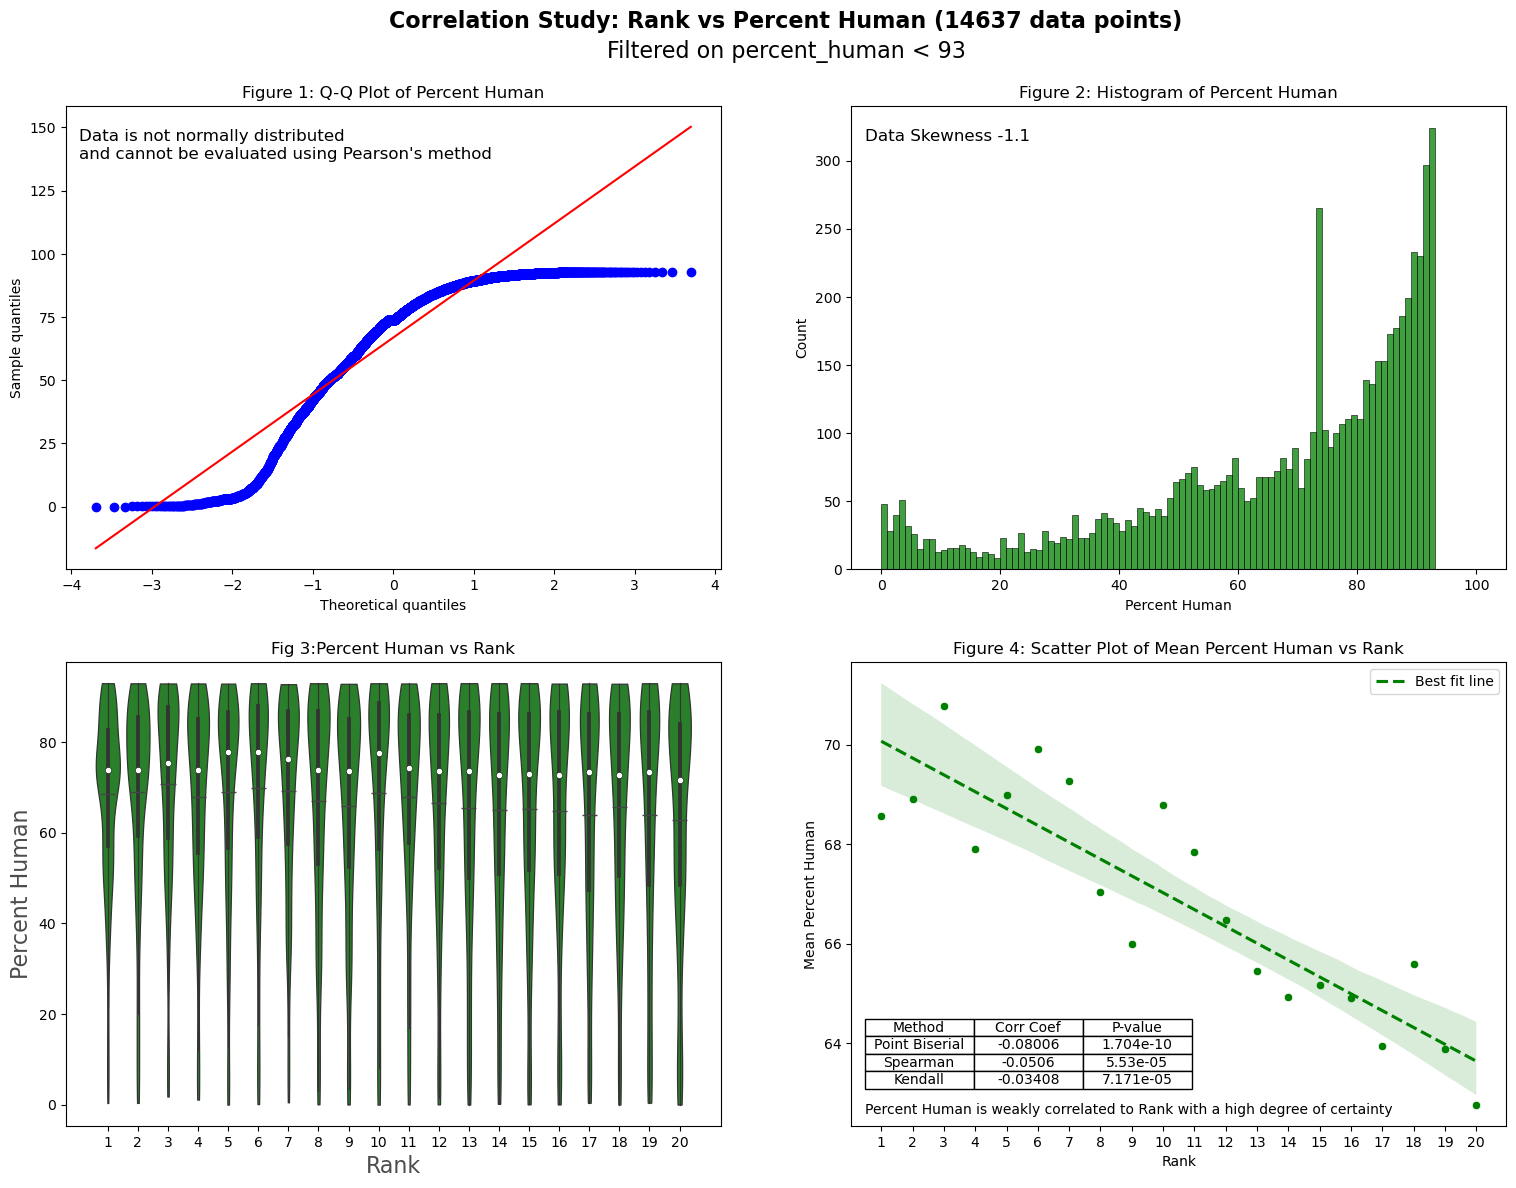

In [62]:
multiplotv(df, 'percent_human', max=93)

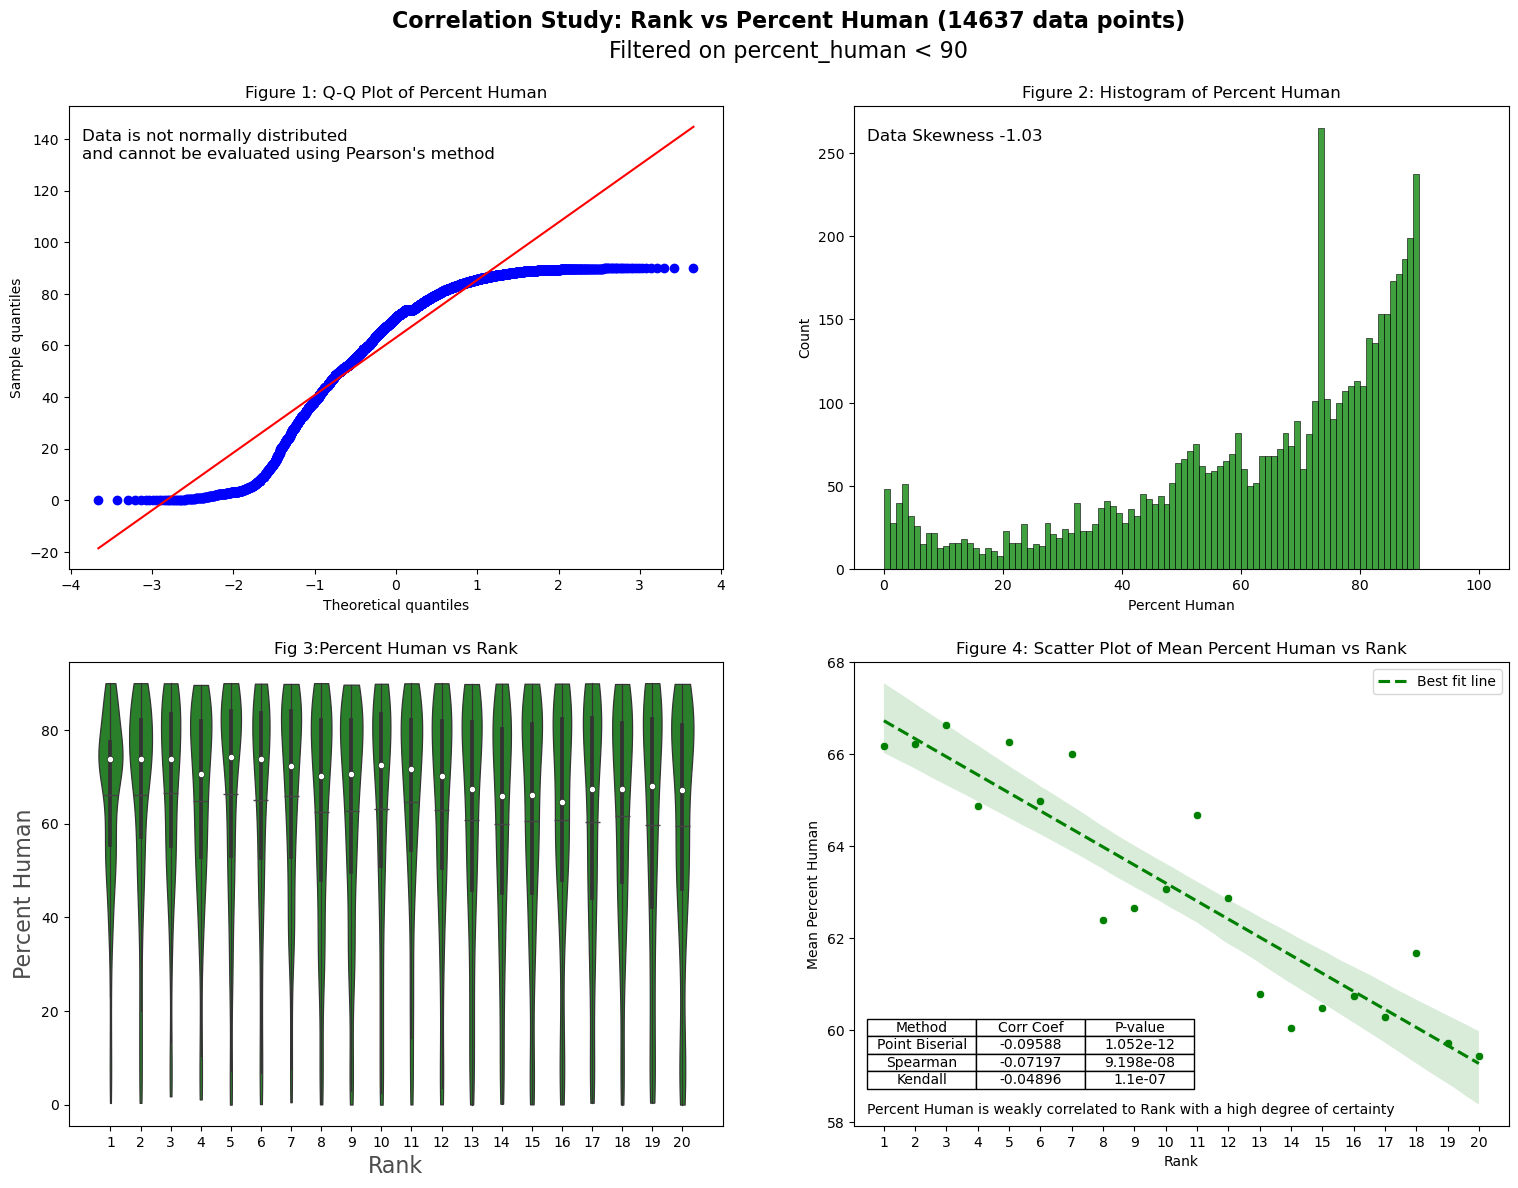

In [63]:
multiplotv(df, 'percent_human', max=90)

In [25]:
# try cube roots

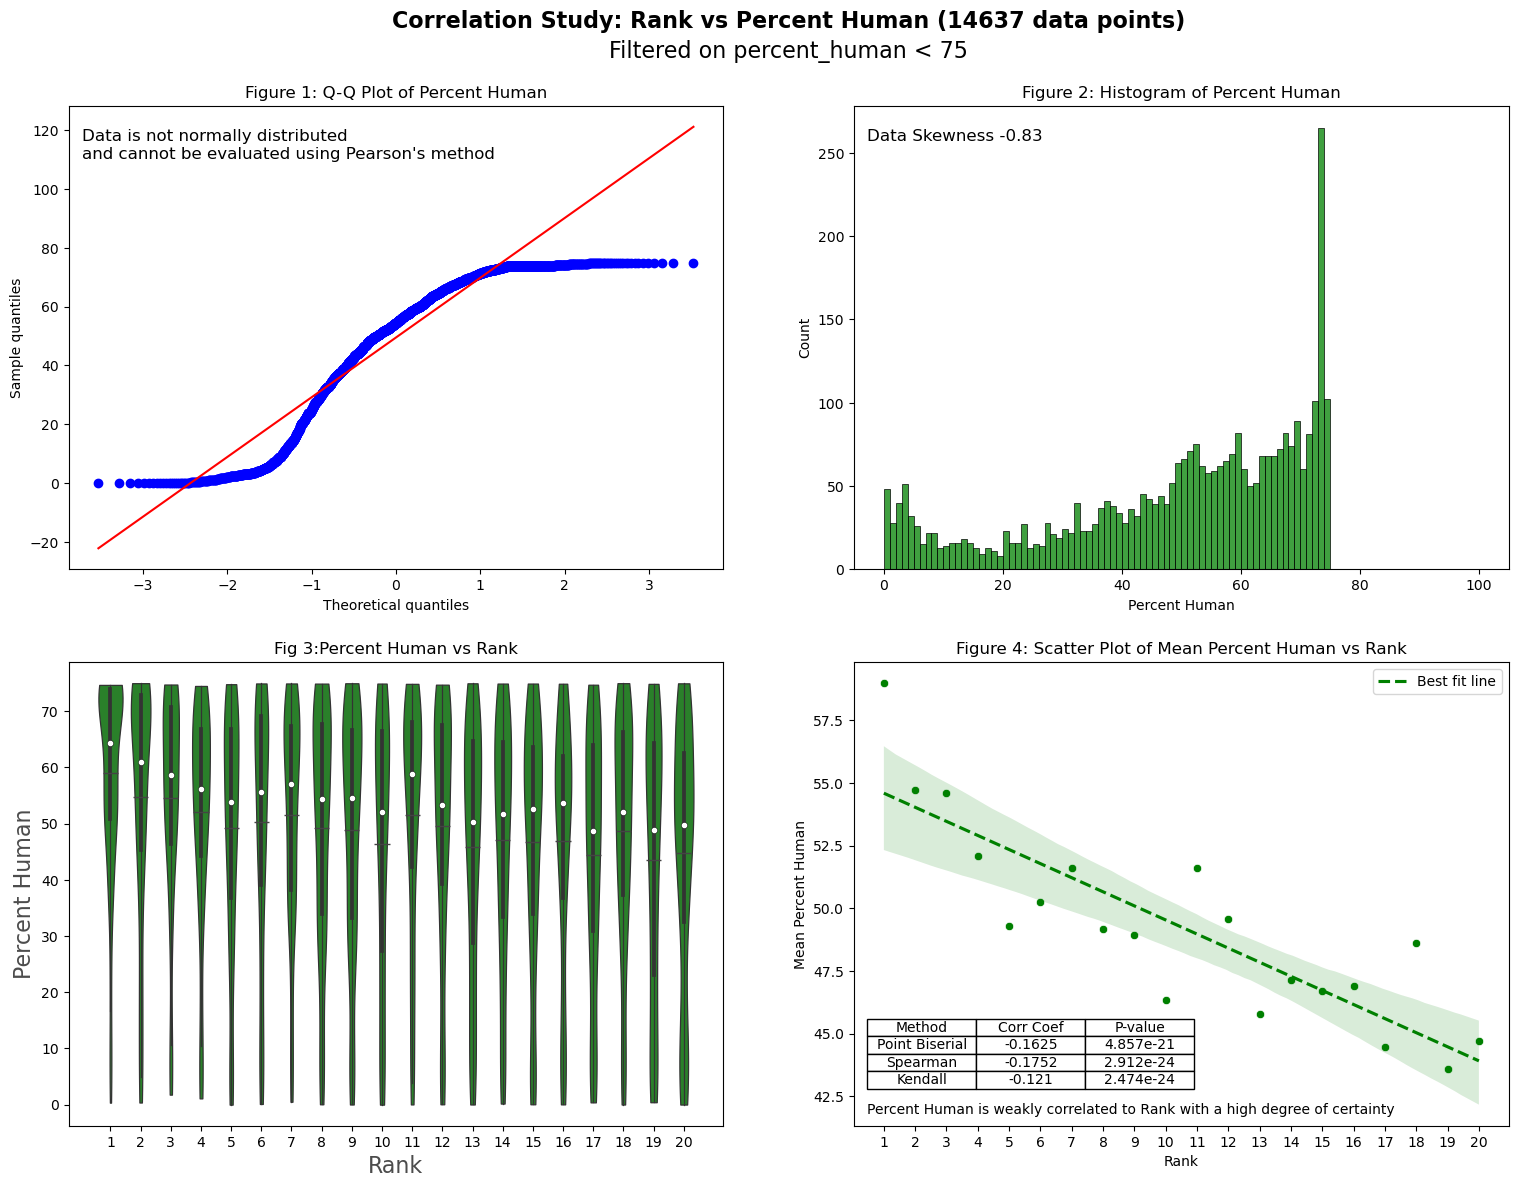

In [64]:
multiplotv(df, 'percent_human', max=75)

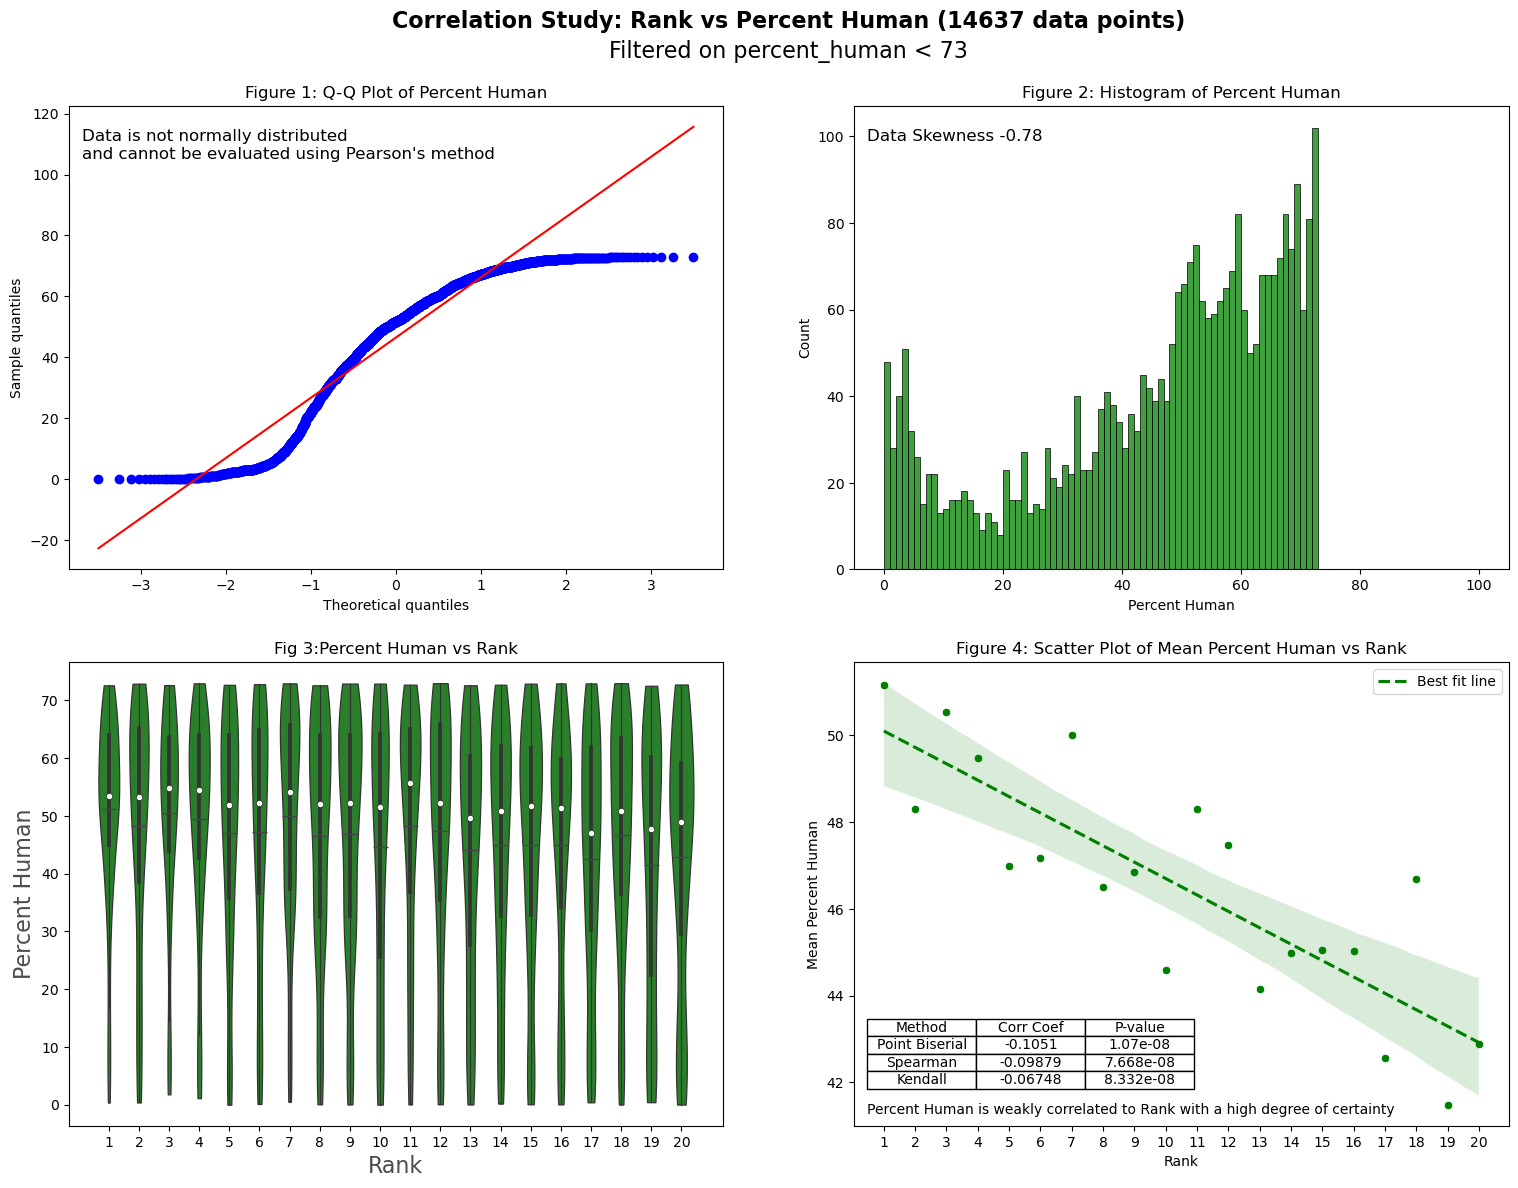

In [65]:
multiplotv(df, 'percent_human', max=73)

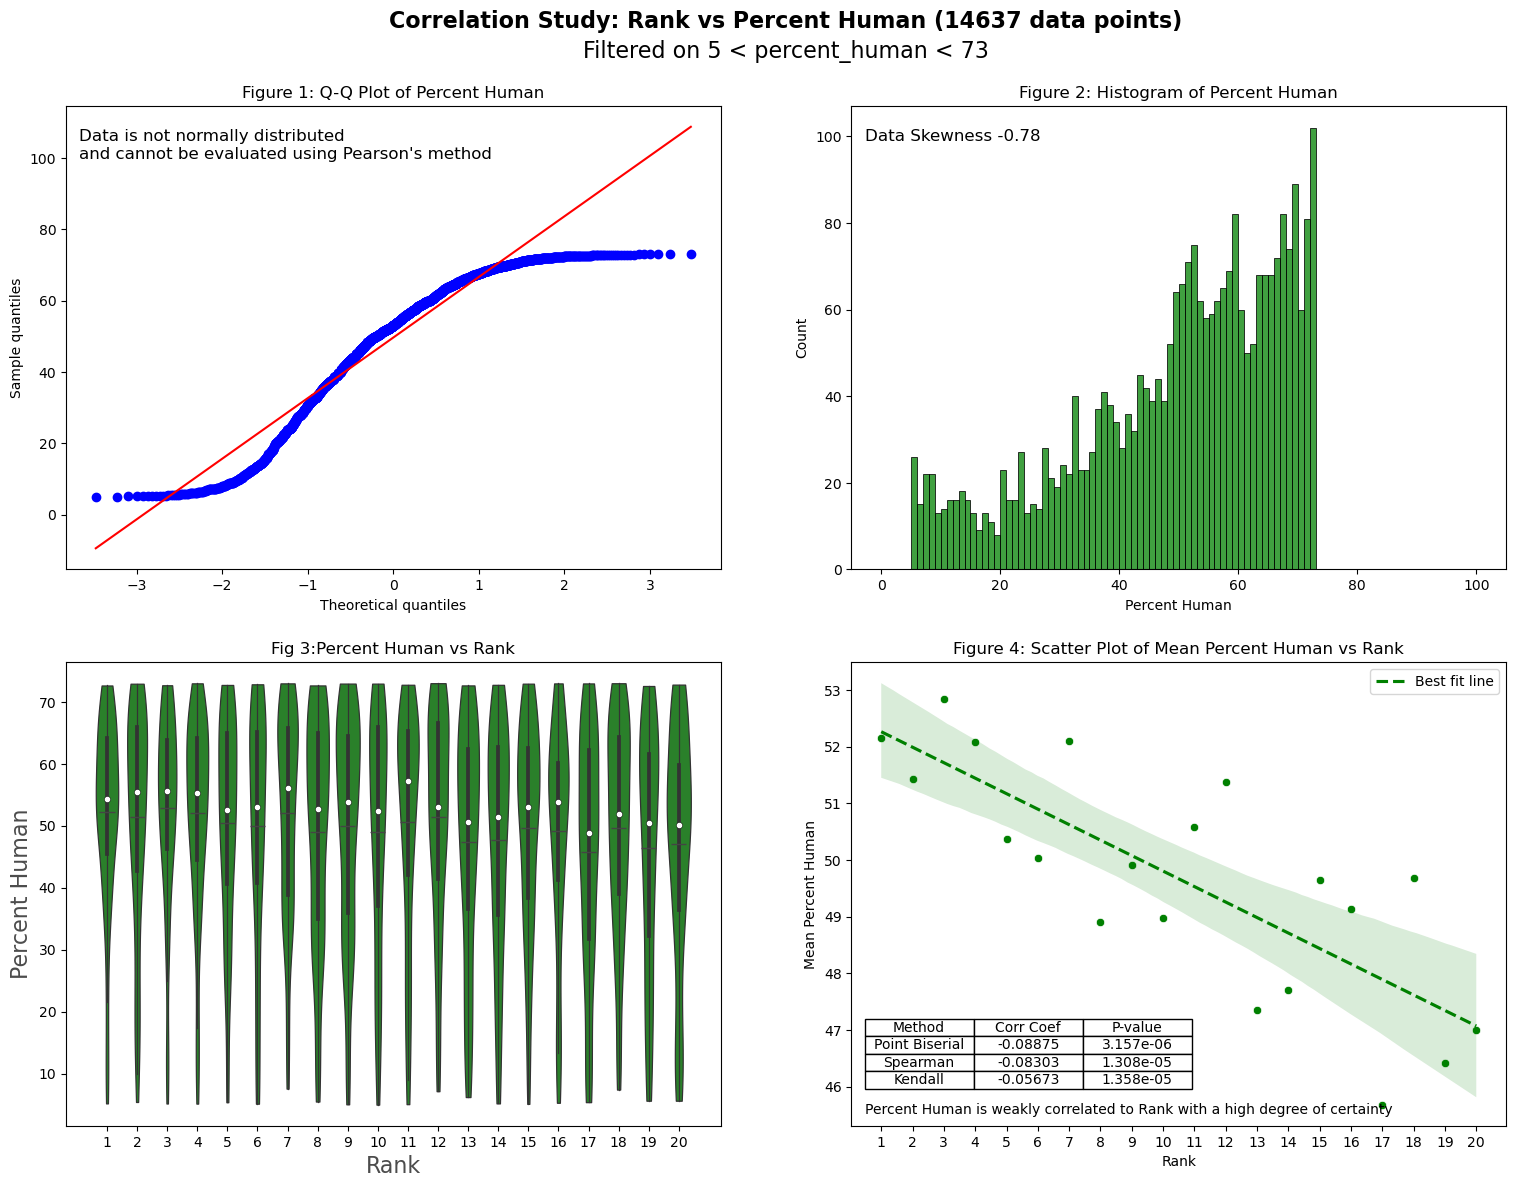

In [67]:
multiplotv(df, 'percent_human',5, max=73)

In [29]:
# one hot Encoding

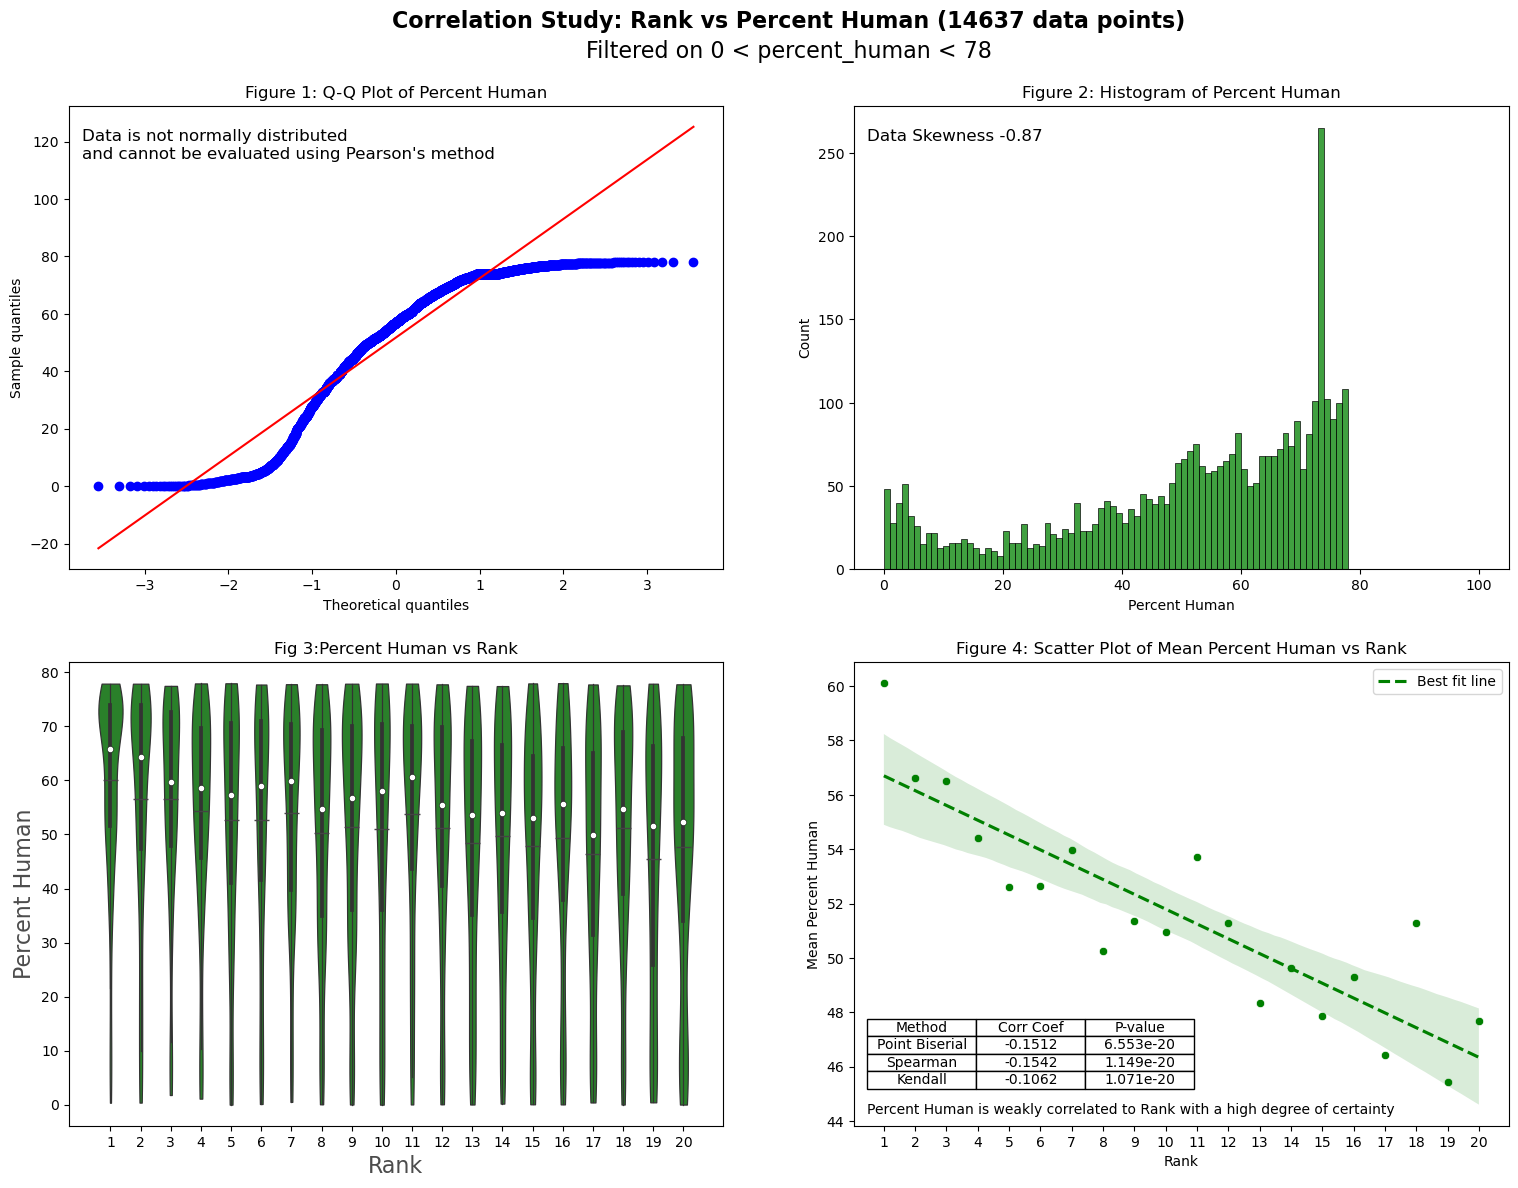

In [84]:
multiplotv(df, 'percent_human', 0, max=78)